#  Projet 07: Implémentez un modèle de scoring

## Partie 01: Nettoyage des données et analyse multivariée

Ce notebook présente un support ou je montre l'ensemble des étapes de nettoyage des données ainsi qu'une étude uni et multivariée. 

"- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -"

    Parcours : Data science.

    Réalisé par Karim Yahiatene.

    Date : 29/05/2021.

"- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -"

# I. Introduction

# I.1 Contexte du projet

## I.2 Problématique et objectifs

# II. Les librairies nécessaires

In [1]:
import pandas as pd
from zipfile import ZipFile
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from scipy import stats
import seaborn as sns
import matplotlib.patches as patches
import goslate
import plotly.graph_objs as go
import plotly.offline as py
from pattern.text.fr import singularize
import json
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
import pickle

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)

# III. Prise en main des données 

## III.01 Lecture des données en format csv

In [4]:
#déziper
filesDirectory= "C:/Users/Karim/Desktop/Data_Science/Projets/Projet_07/00_data/"

In [5]:
filesList=os.listdir(filesDirectory)
listCSV=[]
nameSubDirectory=[]
if len(filesList)!=0:
    for idx, file in enumerate(filesList):
        if (os.path.splitext(os.path.basename(file))[1])==".csv": 
            listCSV.append(filesDirectory+filesList[idx])
else:
    print("please check the folder containt")   
    
    


In [6]:
listCSV

['C:/Users/Karim/Desktop/Data_Science/Projets/Projet_07/00_data/application_test.csv',
 'C:/Users/Karim/Desktop/Data_Science/Projets/Projet_07/00_data/application_train.csv',
 'C:/Users/Karim/Desktop/Data_Science/Projets/Projet_07/00_data/bureau.csv',
 'C:/Users/Karim/Desktop/Data_Science/Projets/Projet_07/00_data/bureau_balance.csv',
 'C:/Users/Karim/Desktop/Data_Science/Projets/Projet_07/00_data/credit_card_balance.csv',
 'C:/Users/Karim/Desktop/Data_Science/Projets/Projet_07/00_data/HomeCredit_columns_description.csv',
 'C:/Users/Karim/Desktop/Data_Science/Projets/Projet_07/00_data/installments_payments.csv',
 'C:/Users/Karim/Desktop/Data_Science/Projets/Projet_07/00_data/POS_CASH_balance.csv',
 'C:/Users/Karim/Desktop/Data_Science/Projets/Projet_07/00_data/previous_application.csv',
 'C:/Users/Karim/Desktop/Data_Science/Projets/Projet_07/00_data/sample_submission.csv']

In [7]:
dfs = {(p.split('/')[8])[:-4]: pd.read_csv(p, encoding= 'unicode_escape') for p in listCSV[:]}

In [8]:
dfs.keys()

dict_keys(['application_test', 'application_train', 'bureau', 'bureau_balance', 'credit_card_balance', 'HomeCredit_columns_description', 'installments_payments', 'POS_CASH_balance', 'previous_application', 'sample_submission'])

In [9]:
#Combien de lignes
shapeDf={key: dfs[key].shape[0] for key in dfs.keys()}
shapeDf

{'application_test': 48744,
 'application_train': 307511,
 'bureau': 1716428,
 'bureau_balance': 27299925,
 'credit_card_balance': 3840312,
 'HomeCredit_columns_description': 219,
 'installments_payments': 13605401,
 'POS_CASH_balance': 10001358,
 'previous_application': 1670214,
 'sample_submission': 48744}

In [10]:
#Combien de colonnes
shapeDf={key: dfs[key].shape[1] for key in dfs.keys()}
shapeDf

{'application_test': 121,
 'application_train': 122,
 'bureau': 17,
 'bureau_balance': 3,
 'credit_card_balance': 23,
 'HomeCredit_columns_description': 5,
 'installments_payments': 8,
 'POS_CASH_balance': 8,
 'previous_application': 37,
 'sample_submission': 2}

In [11]:
dfs['application_test'].head(5)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  ...  \
0           1               1                0                 1  ...   
1           1               1                0                 1  ...   
2           1               1                0                 1  ...   
3           1               1                0                 1  ...   
4           1               1                1                 1  ...   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4 FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0               0                0   
1                1                0               0                0   
2                0                0               0                0   
3                1                0               0                0   
4                1                0               0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8 FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0               0                 0   
1                0                0               0                 0   
2                0                1               0                 0   
3                0                0               0                 0   
4                0                0               0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0   

In [12]:
dfs['application_test'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   NAME_CONTRACT_TYPE            object 
 2   CODE_GENDER                   object 
 3   FLAG_OWN_CAR                  object 
 4   FLAG_OWN_REALTY               object 
 5   CNT_CHILDREN                  int64  
 6   AMT_INCOME_TOTAL              float64
 7   AMT_CREDIT                    float64
 8   AMT_ANNUITY                   float64
 9   AMT_GOODS_PRICE               float64
 10  NAME_TYPE_SUITE               object 
 11  NAME_INCOME_TYPE              object 
 12  NAME_EDUCATION_TYPE           object 
 13  NAME_FAMILY_STATUS            object 
 14  NAME_HOUSING_TYPE             object 
 15  REGION_POPULATION_RELATIVE    float64
 16  DAYS_BIRTH                    int64  
 17  DAYS_EMPLOYED                 int64  
 18  DAYS_REGISTRATION        

In [13]:
dfs['application_train'].head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   ...  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5 FLAG_DOCUMENT_6  \
0  ...                1                0                0               0   
1  ...                1                0                0               0   
2  ...                0                0                0               0   
3  ...                1                0                0               0   
4  ...                0                0                0               0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9 FLAG_DOCUMENT_10  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                1                0                0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   F

In [14]:
dfs['application_train'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [15]:
dfs['bureau'].head(2)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN

In [16]:
dfs['bureau'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [17]:
dfs['bureau_balance'].head(2)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C

In [18]:
dfs['bureau_balance'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [19]:
dfs['credit_card_balance'].head(2)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                      0.00          0.000                 0.000   
1                  60175.08      64875.555             64875.555   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0

In [20]:
dfs['credit_card_balance'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [21]:
dfs['HomeCredit_columns_description'].head(50)

Unnamed: 0                         Table                          Row  \
0            1  application_{train|test}.csv                   SK_ID_CURR   
1            2  application_{train|test}.csv                       TARGET   
2            5  application_{train|test}.csv           NAME_CONTRACT_TYPE   
3            6  application_{train|test}.csv                  CODE_GENDER   
4            7  application_{train|test}.csv                 FLAG_OWN_CAR   
5            8  application_{train|test}.csv              FLAG_OWN_REALTY   
6            9  application_{train|test}.csv                 CNT_CHILDREN   
7           10  application_{train|test}.csv             AMT_INCOME_TOTAL   
8           11  application_{train|test}.csv                   AMT_CREDIT   
9           12  application_{train|test}.csv                  AMT_ANNUITY   
10          13  application_{train|test}.csv              AMT_GOODS_PRICE   
11          14  application_{train|test}.csv              NAME_TYPE_SUITE   
12          15  application_{train|test}.csv             NAME_INCOME_TYPE   
13          16  application_{train|test}.csv          NAME_EDUCATION_TYPE   
14          17  application_{train|test}.csv           NAME_FAMILY_STATUS   
15          18  application_{train|test}.csv            NAME_HOUSING_TYPE   
16          19  application_{train|test}.csv   REGION_POPULATION_RELATIVE   
17          20  application_{train|test}.csv                   DAYS_BIRTH   
18          21  application_{train|test}.csv                DAYS_EMPLOYED   
19          22  application_{train|test}.csv            DAYS_REGISTRATION   
20          23  application_{train|test}.csv              DAYS_ID_PUBLISH   
21          24  application_{train|test}.csv                  OWN_CAR_AGE   
22          25  application_{train|test}.csv                   FLAG_MOBIL   
23          26  application_{train|test}.csv               FLAG_EMP_PHONE   
24          27  application_{train|test}.csv              FLAG_WORK_PHONE   
25          28  application_{train|test}.csv             FLAG_CONT_MOBILE   
26          29  application_{train|test}.csv                   FLAG_PHONE   
27          30  application_{train|test}.csv                   FLAG_EMAIL   
28          31  application_{train|test}.csv              OCCUPATION_TYPE   
29          32  application_{train|test}.csv              CNT_FAM_MEMBERS   
30          33  application_{train|test}.csv         REGION_RATING_CLIENT   
31          34  application_{train|test}.csv  REGION_RATING_CLIENT_W_CITY   
32          35  application_{train|test}.csv   WEEKDAY_APPR_PROCESS_START   
33          36  application_{train|test}.csv      HOUR_APPR_PROCESS_START   
34          37  application_{train|test}.csv   REG_REGION_NOT_LIVE_REGION   
35          38  application_{train|test}.csv   REG_REGION_NOT_WORK_REGION   
36          39  application_{train|test}.csv  LIVE_REGION_NOT_WORK_REGION   
37          40  application_{train|test}.csv       REG_CITY_NOT_LIVE_CITY   
38          41  application_{train|test}.csv       REG_CITY_NOT_WORK_CITY   
39          42  application_{train|test}.csv      LIVE_CITY_NOT_WORK_CITY   
40          43  application_{train|test}.csv            ORGANIZATION_TYPE   
41          44  application_{train|test}.csv                 EXT_SOURCE_1   
42          45  application_{train|test}.csv                 EXT_SOURCE_2   
43          46  application_{train|test}.csv                 EXT_SOURCE_3   
44          47  application_{train|test}.csv               APARTMENTS_AVG   
45          48  application_{train|test}.csv             BASEMENTAREA_AVG   
46          49  application_{train|test}.csv  YEARS_BEGINEXPLUATATION_AVG   
47          50  application_{train|test}.csv              YEARS_BUILD_AVG   
48          51  application_{train|test}.csv               COMMONAREA_AVG   
49          52  application_{train|test}.csv                ELEVATORS_AVG   

                                                                            

In [22]:
dfs['HomeCredit_columns_description'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB


In [23]:
dfs['installments_payments'].head(2)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525

In [24]:
dfs['installments_payments'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [25]:
dfs['POS_CASH_balance'].head(2)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0

In [26]:


dfs['POS_CASH_balance'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [27]:
dfs['previous_application'].head(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP             NaN   
1           -164                    XNA                XAP   Unaccompanied   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   

     CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0    Country-wide                35         Connectivity         12.0   
1  Contact center                -1                  XNA         36.0   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0           middle  POS mobile with interest            365243.0   
1       low_action          Cash X-Sell: low            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0

In [28]:
dfs['previous_application'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [29]:
dfs['sample_submission']

SK_ID_CURR  TARGET
0          100001     0.5
1          100005     0.5
2          100013     0.5
3          100028     0.5
4          100038     0.5
...           ...     ...
48739      456221     0.5
48740      456222     0.5
48741      456223     0.5
48742      456224     0.5
48743      456250     0.5

[48744 rows x 2 columns]

In [30]:
dfs['sample_submission'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


# Etude univariée et multivariée

In [31]:
#application_train et application_test

In [32]:
dfs['application_train'].index=dfs['application_train']['SK_ID_CURR']
dfs['application_test'].index=dfs['application_test']['SK_ID_CURR']

dfs['application_train'].update(dfs['application_test'])
dfs['application_train'].index=range(dfs['application_train'].shape[0])

In [33]:
train=dfs['application_train'].copy()
# test=dfs['application_test'].copy()

In [34]:
train.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   

   ...  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5 FLAG_DOCUMENT_6  \
0  ...                1                0                0               0   
1  ...                1                0                0               0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9 FLAG_DOCUMENT_10  \
0                0                0                0                0   
1                0                0                0                0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17 FLAG_DOCUMENT_18  \
0                 0                 0                 0                0   
1                 0                 0                 0                0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0   
1                 0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  

[2 rows x 122 columns]

In [35]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

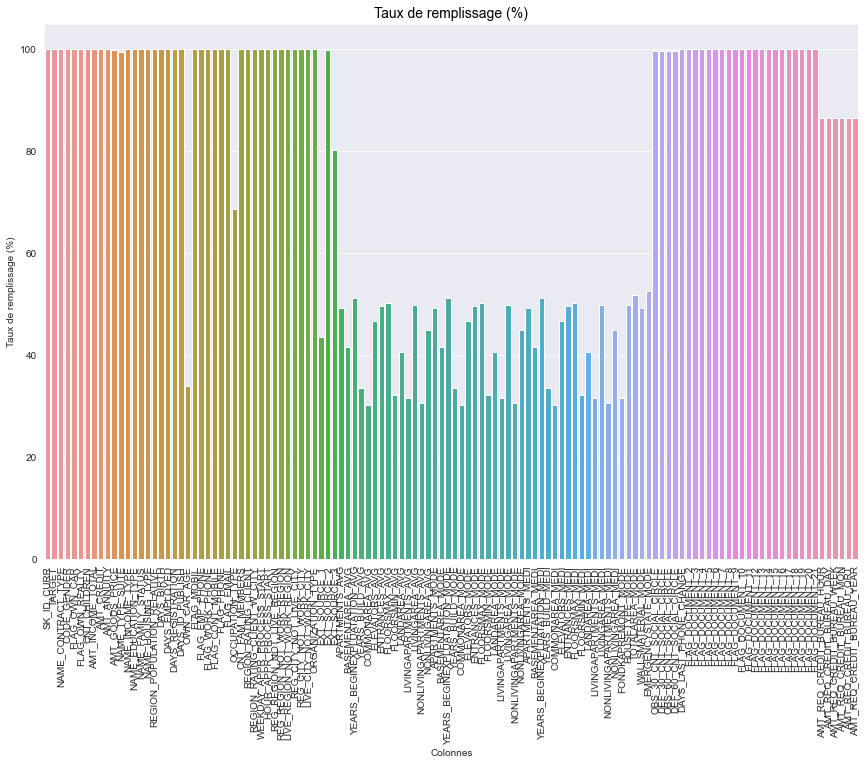

In [36]:
taux=100*(1-(train.isin([np.nan, np.inf, -np.inf]).sum()/train.shape[0]))
dataCount=pd.DataFrame({'Taux de remplissage (%)':list(taux),'Colonnes':list(train.columns)})
df=dataCount
# df=dataCount.loc[dataCount['Taux de remplissage (%)']>75]
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(12, 8))
fig.tight_layout()

sns.barplot(x="Colonnes",
              y="Taux de remplissage (%)", 
              data=df,ax=ax)
sns.set(font_scale=0.5)
ax.set_title("Taux de remplissage (%)", fontsize=14, color="Black")

g=plt.xticks(rotation=90)

# plt.setp( ax.xaxis.get_majorticklabels(), rotation=90, ha="left" )

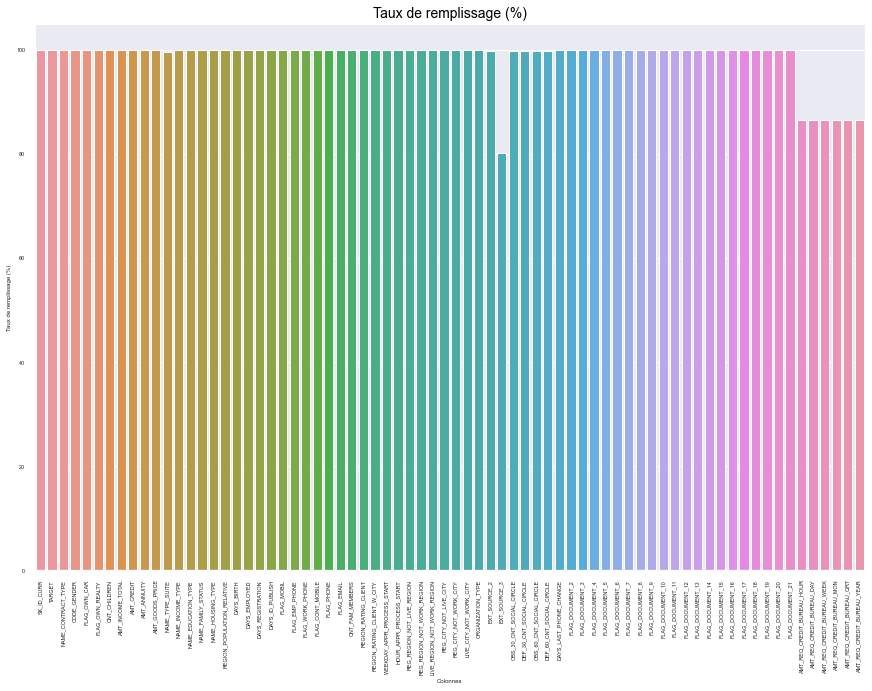

In [37]:
taux=100*(1-(train.isin([np.nan, np.inf, -np.inf]).sum()/train.shape[0]))
dataCount=pd.DataFrame({'Taux de remplissage (%)':list(taux),'Colonnes':list(train.columns)})
df=dataCount.loc[dataCount['Taux de remplissage (%)']>75]
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(12, 8))
fig.tight_layout()

sns.barplot(x="Colonnes",
              y="Taux de remplissage (%)", 
              data=df,ax=ax)
sns.set(font_scale=1)
ax.set_title("Taux de remplissage (%)", fontsize=14, color="Black")

g=plt.xticks(rotation=90)

# plt.setp( ax.xaxis.get_majorticklabels(), rotation=90, ha="left" )

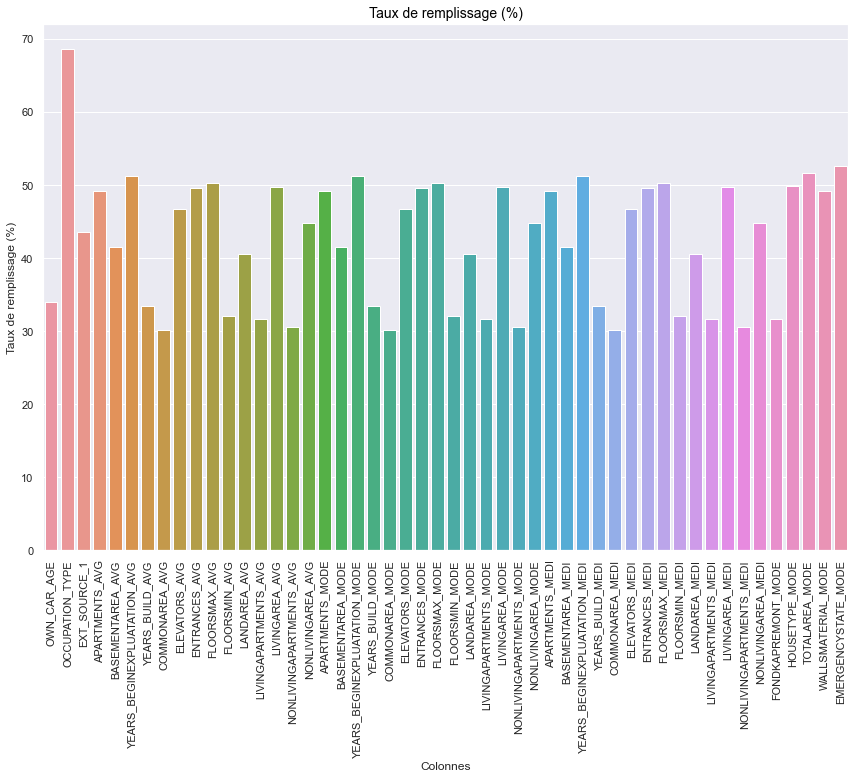

In [38]:
taux=100*(1-(train.isin([np.nan, np.inf, -np.inf]).sum()/train.shape[0]))
dataCount=pd.DataFrame({'Taux de remplissage (%)':list(taux),'Colonnes':list(train.columns)})
df=dataCount.loc[dataCount['Taux de remplissage (%)']<=75]
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(12, 8))
fig.tight_layout()

sns.barplot(x="Colonnes",
              y="Taux de remplissage (%)", 
              data=df,ax=ax)
sns.set(font_scale=1)
ax.set_title("Taux de remplissage (%)", fontsize=14, color="Black")

g=plt.xticks(rotation=90)

# plt.setp( ax.xaxis.get_majorticklabels(), rotation=90, ha="left" )

In [39]:
sns.set()

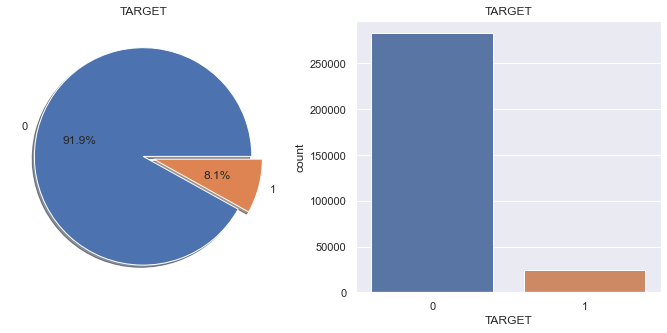

In [40]:
figure ,ax = plt.subplots(1, 2, figsize=(12,5))

train['TARGET'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('TARGET')
ax[0].set_ylabel('')

sns.countplot(x='TARGET', data=train, ax=ax[1])
ax[1].set_title('TARGET')

plt.show()

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

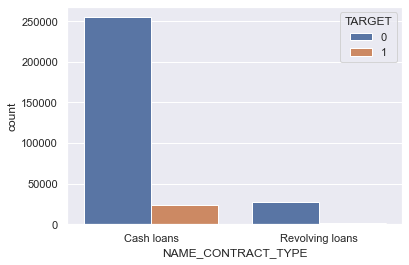

In [41]:
sns.countplot(x='NAME_CONTRACT_TYPE', data=train, hue='TARGET')


<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

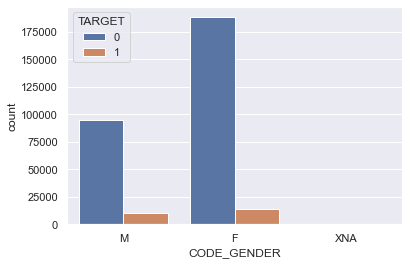

In [42]:
sns.countplot(x='CODE_GENDER', data=train, hue='TARGET')

<AxesSubplot:xlabel='FLAG_OWN_CAR', ylabel='count'>

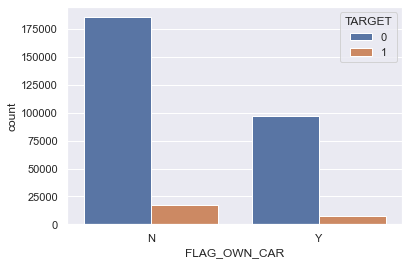

In [43]:
sns.countplot(x='FLAG_OWN_CAR', data=train, hue='TARGET')


<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

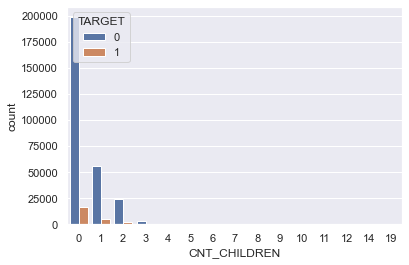

In [44]:
sns.countplot(x='CNT_CHILDREN', data=train, hue='TARGET') 

<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

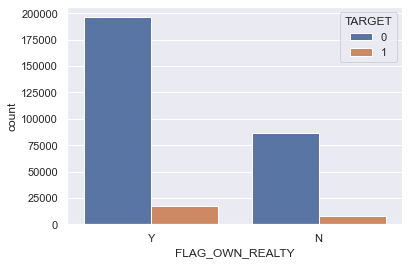

In [45]:
sns.countplot(x='FLAG_OWN_REALTY', data=train, hue='TARGET')

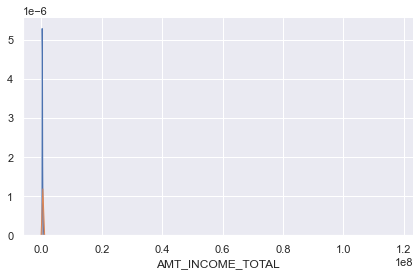

In [46]:
fig = sns.FacetGrid(train, hue='TARGET', height=4, aspect=1.5)
fig.map(sns.kdeplot, 'AMT_INCOME_TOTAL', shade=True)

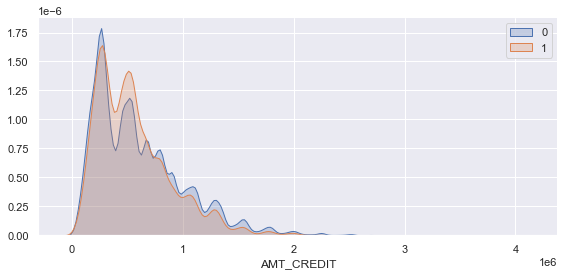

In [47]:
fig = sns.FacetGrid(train, hue='TARGET', height=4, aspect=2)
fig.map(sns.kdeplot, 'AMT_CREDIT', shade=True)
plt.legend()

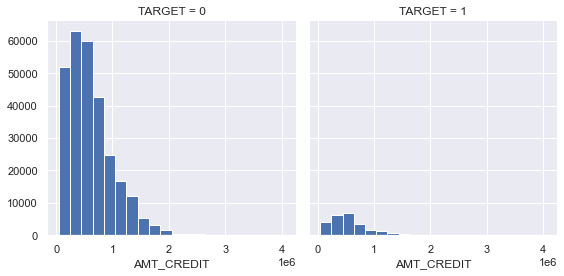

In [48]:
grid = sns.FacetGrid(train, col='TARGET', height=4, aspect=1)
grid.map(plt.hist, 'AMT_CREDIT', bins=20)

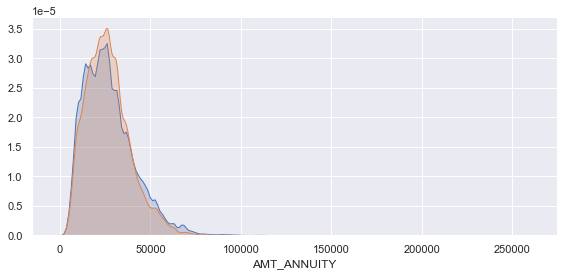

In [49]:
fig = sns.FacetGrid(train, hue='TARGET', height=4, aspect=2)
fig.map(sns.kdeplot, 'AMT_ANNUITY', shade=True)

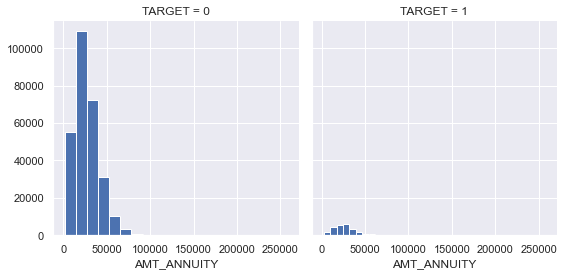

In [50]:
grid = sns.FacetGrid(train, col='TARGET', height=4, aspect=1)
grid.map(plt.hist, 'AMT_ANNUITY', bins=20)

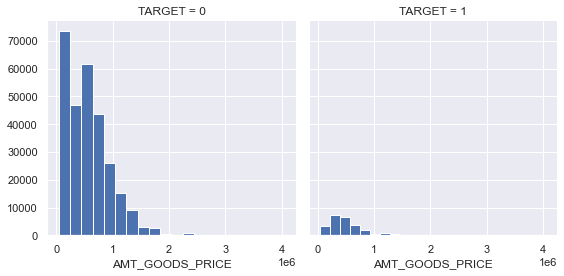

In [51]:
grid = sns.FacetGrid(train, col='TARGET', height=4, aspect=1)
grid.map(plt.hist, 'AMT_GOODS_PRICE', bins=20)

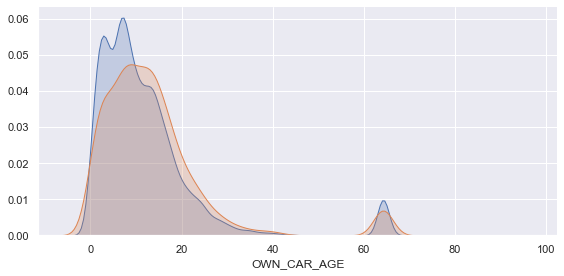

In [52]:
fig = sns.FacetGrid(train, hue='TARGET', height=4, aspect=2)
fig.map(sns.kdeplot, 'OWN_CAR_AGE', shade=True)

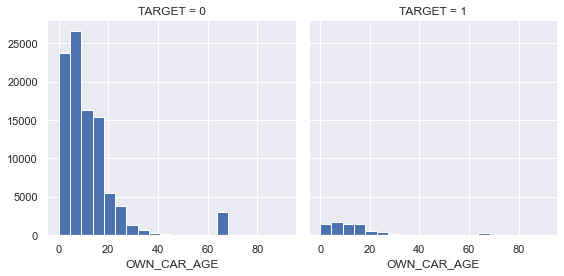

In [53]:
grid = sns.FacetGrid(train, col='TARGET', height=4, aspect=1)
grid.map(plt.hist, 'OWN_CAR_AGE', bins=20)

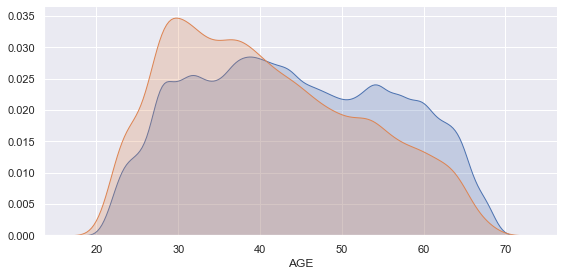

In [54]:
train['AGE'] = train['DAYS_BIRTH'] / 365 * (-1)
# test['AGE'] = test['DAYS_BIRTH'] / 365 * (-1)

train = train.drop('DAYS_BIRTH', axis=1)
# test = test.drop('DAYS_BIRTH', axis=1)

fig = sns.FacetGrid(train, hue='TARGET', height=4, aspect=2)
fig.map(sns.kdeplot, 'AGE', shade=True)

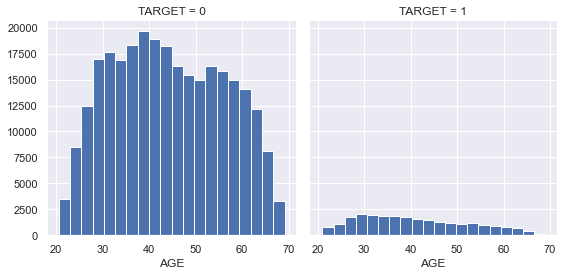

In [55]:
grid = sns.FacetGrid(train, col='TARGET', height=4, aspect=1)
grid.map(plt.hist, 'AGE', bins=20)

<AxesSubplot:xlabel='NAME_TYPE_SUITE', ylabel='count'>

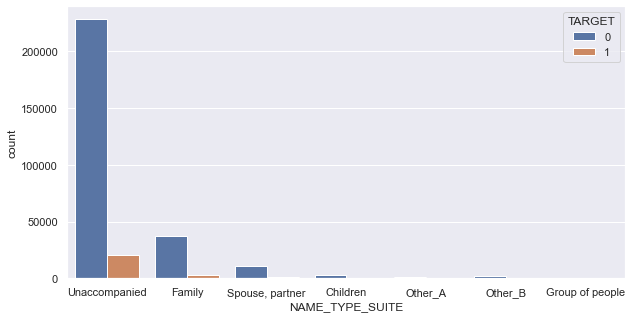

In [56]:
plt.figure(figsize=(10, 5))
sns.countplot(x='NAME_TYPE_SUITE', data=train, hue='TARGET')

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

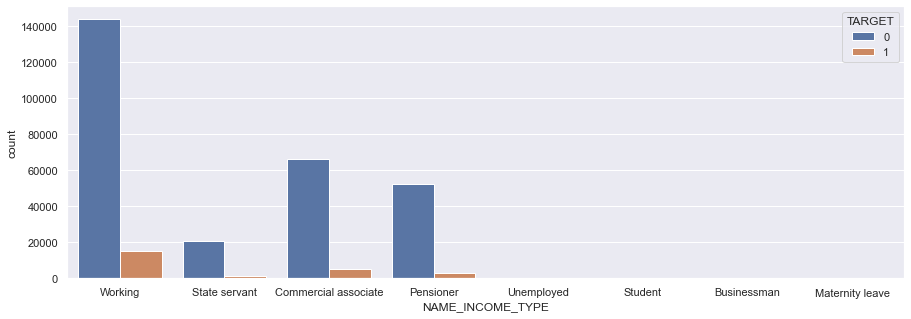

In [57]:
plt.figure(figsize=(15, 5))
sns.countplot(x='NAME_INCOME_TYPE', data=train, hue='TARGET')

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='count'>

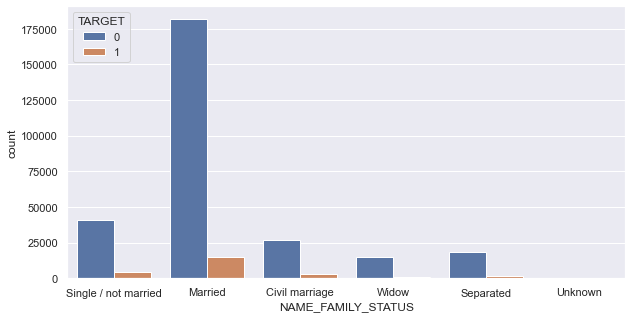

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(x='NAME_FAMILY_STATUS', data=train, hue='TARGET')

<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='count'>

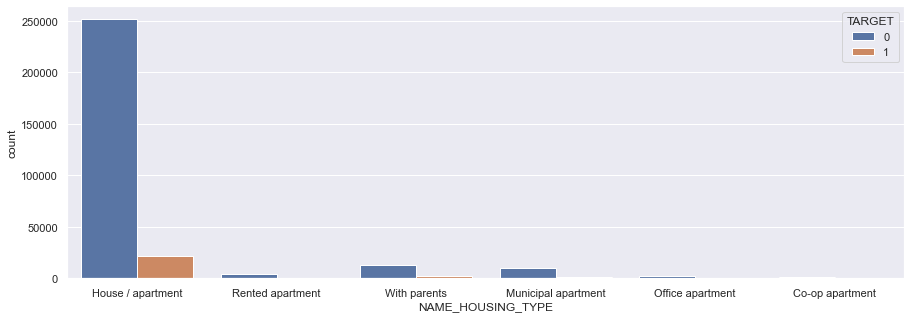

In [59]:
plt.figure(figsize=(15, 5))
sns.countplot(x='NAME_HOUSING_TYPE', data=train, hue='TARGET')

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

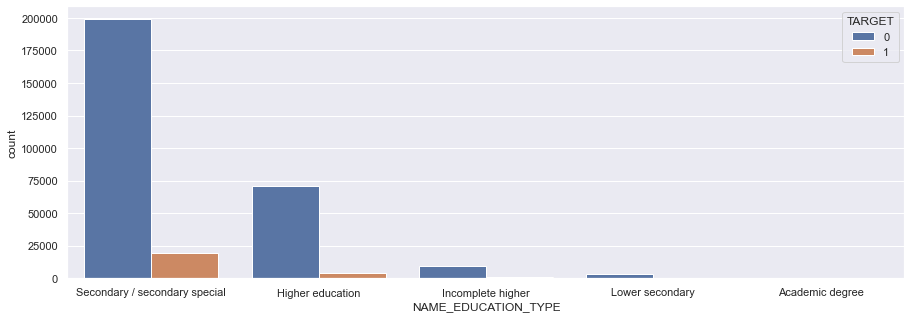

In [60]:
plt.figure(figsize=(15, 5))
sns.countplot(x='NAME_EDUCATION_TYPE', data=train, hue='TARGET')


In [61]:
train.NAME_EDUCATION_TYPE.drop_duplicates().tolist()

['Secondary / secondary special',
 'Higher education',
 'Incomplete higher',
 'Lower secondary',
 'Academic degree']

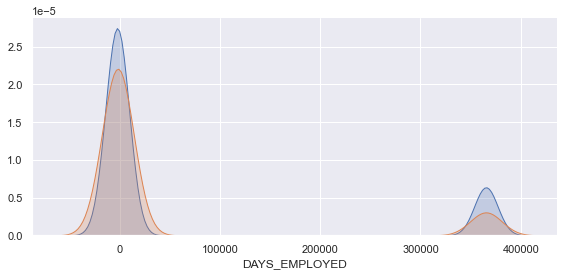

In [62]:
fig = sns.FacetGrid(train, hue='TARGET', height=4, aspect=2)
fig.map(sns.kdeplot, 'DAYS_EMPLOYED', shade=True)


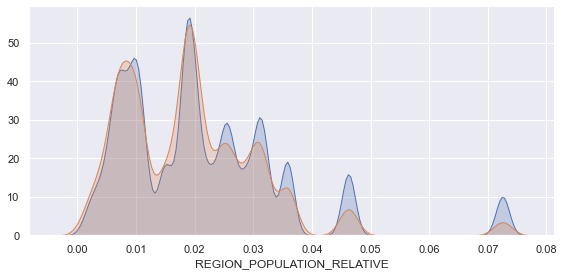

In [63]:
fig = sns.FacetGrid(train, hue='TARGET', height=4, aspect=2)
fig.map(sns.kdeplot, 'REGION_POPULATION_RELATIVE', shade=True)

<AxesSubplot:xlabel='count', ylabel='ORGANIZATION_TYPE'>

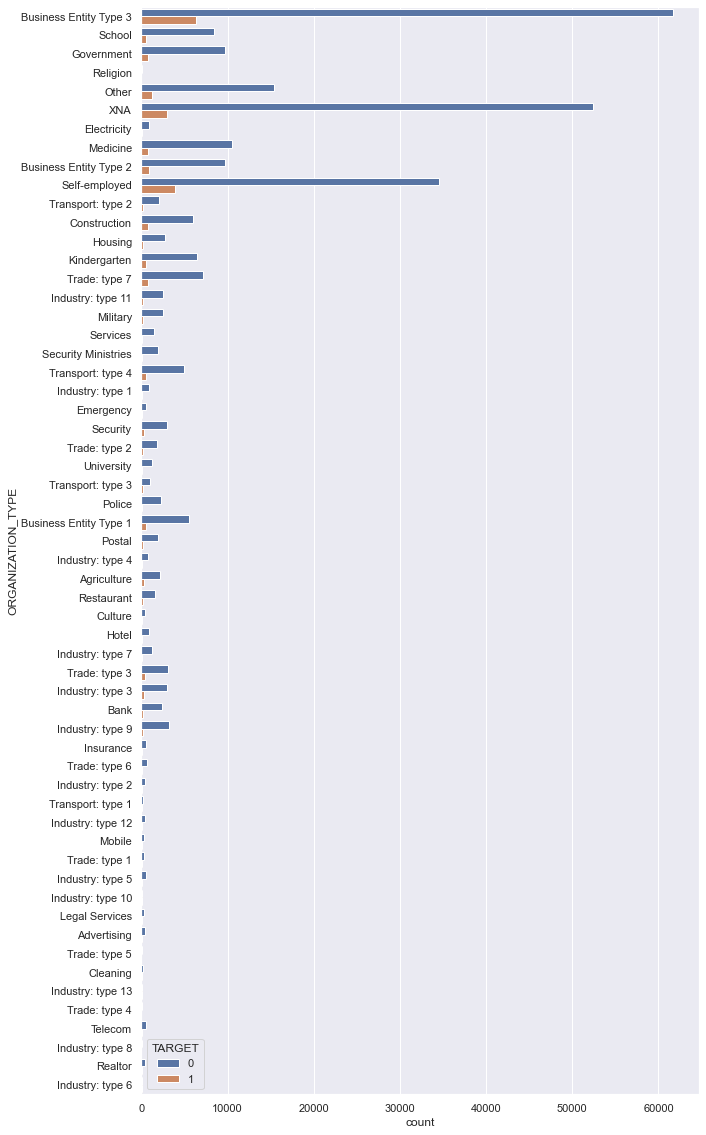

In [64]:
plt.figure(figsize=(10, 20))
sns.countplot(y='ORGANIZATION_TYPE', data=train, hue='TARGET')


In [65]:
train.OCCUPATION_TYPE.drop_duplicates().dropna().tolist()

['Laborers',
 'Core staff',
 'Accountants',
 'Managers',
 'Drivers',
 'Sales staff',
 'Cleaning staff',
 'Cooking staff',
 'Private service staff',
 'Medicine staff',
 'Security staff',
 'High skill tech staff',
 'Waiters/barmen staff',
 'Low-skill Laborers',
 'Realty agents',
 'Secretaries',
 'IT staff',
 'HR staff']

<AxesSubplot:xlabel='count', ylabel='OCCUPATION_TYPE'>

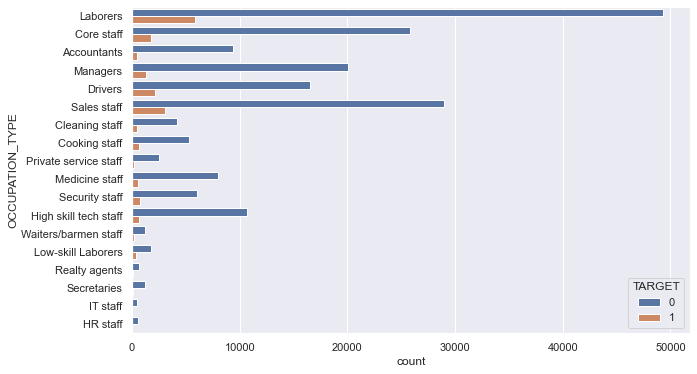

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(y='OCCUPATION_TYPE', data=train, hue='TARGET')

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='count'>

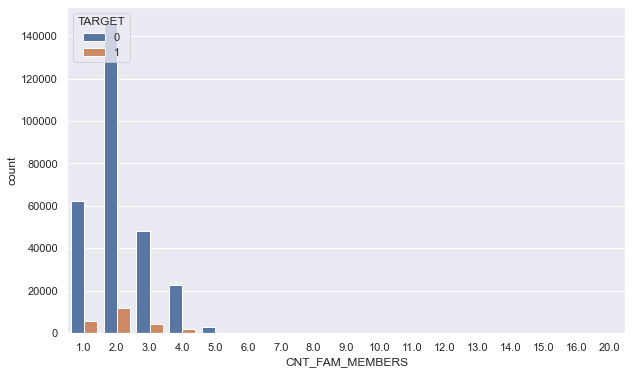

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CNT_FAM_MEMBERS', data=train, hue='TARGET')

In [68]:
dfs['HomeCredit_columns_description'].head(122)

Unnamed: 0                         Table                         Row  \
0             1  application_{train|test}.csv                  SK_ID_CURR   
1             2  application_{train|test}.csv                      TARGET   
2             5  application_{train|test}.csv          NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv                 CODE_GENDER   
4             7  application_{train|test}.csv                FLAG_OWN_CAR   
..          ...                           ...                         ...   
117         120  application_{train|test}.csv   AMT_REQ_CREDIT_BUREAU_DAY   
118         121  application_{train|test}.csv  AMT_REQ_CREDIT_BUREAU_WEEK   
119         122  application_{train|test}.csv   AMT_REQ_CREDIT_BUREAU_MON   
120         123  application_{train|test}.csv   AMT_REQ_CREDIT_BUREAU_QRT   
121         124  application_{train|test}.csv  AMT_REQ_CREDIT_BUREAU_YEAR   

                                                                                                                                                                                     Description  \
0                                                                                                                                                                       ID of loan in our sample   
1    Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)   
2                                                                                                                                                    Identification if loan is cash or revolving   
3                                                                                                                                                                           Gender of the client   
4                                                                                                                                                                  Flag if the client owns a car   
..                                                                                                                                                                                           ...   
117                                                                     Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)   
118                                                                     Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)   
119                                                                   Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)   
120                                                                    Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)   
121                                                                              Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)   

    Special  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
..      ...  
117     NaN  
118     NaN  
119     NaN  
120     NaN  
121     NaN  

[122 rows x 5 columns]

In [69]:
train.head(50)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   
20      100024       0    Revolving loans           M            Y   
21      100025       0         Cash loans           F            Y   
22      100026       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
24      100029       0         Cash loans           M            Y   
25      100030       0         Cash loans           F            N   
26      100031       1         Cash loans           F            N   
27      100032       0         Cash loans           M            N   
28      100033       0         Cash loans           M            Y   
29      100034       0    Revolving loans           M            N   
30      100035       0         Cash loans           F            N   
31      100036       0         Cash loans           F            N   
32      100037       0         Cash loans           F            N   
33      100039       0         Cash loans           M            Y   
34      100040       0         Cash loans           F            N   
35      100041       0         Cash loans           F            N   
36      100043       0         Cash loans           F            N   
37      100044       0         Cash loans           M            N   
38      100045       0         Cash loans           F            N   
39      100046       0    Revolving loans           M            Y   
40      100047       1         Cash loans           M            N   
41      100048       0         Cash loans           F            N   
42      100049       1         Cash loans           F            N   
43      100050       0         Cash loans           F            N   
44      100051       0         Cash loans           M            N   
45      100052       0    Revolving loans           F            N   
46      100053       0         Cash loans           F            N   
47      100054       0         Cash loans           F            N   
48      100055       0         Cash loans           F            N   
49      100056       0         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0      

In [70]:
used_columns=["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","CNT_CHILDREN","FLAG_OWN_REALTY","AMT_INCOME_TOTAL",
              "AMT_CREDIT","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","OWN_CAR_AGE","DAYS_BIRTH","NAME_TYPE_SUITE",
              "NAME_INCOME_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","NAME_EDUCATION_TYPE""DAYS_EMPLOYED",
              "REGION_POPULATION_RELATIVE","ORGANIZATION_TYPE","OCCUPATION_TYPE","CNT_FAM_MEMBERS"]

In [71]:
inused_columns=set(train.columns.tolist())-set(used_columns)


In [72]:
#'bureau' et  'bureau_balance'

In [73]:
dfs['bureau'].index=dfs['bureau']["SK_ID_BUREAU"]
dfs['bureau']=dfs['bureau'].drop(columns='SK_ID_BUREAU')

dfs['bureau_balance'].index=dfs['bureau_balance']["SK_ID_BUREAU"]
dfs['bureau_balance']=dfs['bureau_balance'].drop(columns='SK_ID_BUREAU')

In [74]:
dfs['bureau_balance'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27299925 entries, 5715448 to 5041336
Data columns (total 2 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   MONTHS_BALANCE  int64 
 1   STATUS          object
dtypes: int64(1), object(1)
memory usage: 624.8+ MB


In [75]:
dfs['bureau_bureau_balance']=dfs['bureau'].join(dfs['bureau_balance'])

In [76]:
dfs['bureau_bureau_balance'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25121815 entries, 5000000 to 6843457
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   CREDIT_ACTIVE           object 
 2   CREDIT_CURRENCY         object 
 3   DAYS_CREDIT             int64  
 4   CREDIT_DAY_OVERDUE      int64  
 5   DAYS_CREDIT_ENDDATE     float64
 6   DAYS_ENDDATE_FACT       float64
 7   AMT_CREDIT_MAX_OVERDUE  float64
 8   CNT_CREDIT_PROLONG      int64  
 9   AMT_CREDIT_SUM          float64
 10  AMT_CREDIT_SUM_DEBT     float64
 11  AMT_CREDIT_SUM_LIMIT    float64
 12  AMT_CREDIT_SUM_OVERDUE  float64
 13  CREDIT_TYPE             object 
 14  DAYS_CREDIT_UPDATE      int64  
 15  AMT_ANNUITY             float64
 16  MONTHS_BALANCE          float64
 17  STATUS                  object 
dtypes: float64(9), int64(5), object(4)
memory usage: 3.6+ GB


In [77]:
def groupAndAgg(df,groupbyCol):
#     df.index=df[groupbyCol]
#     df=df.drop(columns=groupbyCol)
    
    df_float=df.loc[:, df.dtypes != np.object]
    df_str=df.loc[:, df.dtypes == np.object]
    df_str[groupbyCol]=df[groupbyCol]
    listAgg=[]
    listColAgg=[]
    for col in df_float.columns[1:]:
        if col.find('ID')==-1:
            listAgg.append(df_float.groupby(groupbyCol).agg({col:'mean'}))
            listColAgg.append(col+"_mean")
        else:
            listAgg.append(df_float.groupby(groupbyCol).agg({col:'count'}))
            listColAgg.append(col+"_count")
            
    for col in df_str.columns:
        listAgg.append(df_str.groupby(groupbyCol).agg({col:'count'})  )
        listColAgg.append(col+"_count")
    
    myarray = np.asarray(listAgg)
    myarray=myarray.reshape((myarray.shape[0],myarray.shape[1]))
    output_df=pd.DataFrame(myarray.T)
    output_df.columns=listColAgg
    output_df[groupbyCol]=df[groupbyCol].drop_duplicates().tolist()
    
    return output_df

In [78]:
## decouper le dataset en plusieurs petites partie
l=int(dfs['bureau_bureau_balance'].shape[0]/4)
part_01=groupAndAgg(dfs['bureau_bureau_balance'].iloc[:l],'SK_ID_CURR')
print("part_01 done")
part_02=groupAndAgg(dfs['bureau_bureau_balance'].iloc[l:2*l],'SK_ID_CURR')
print("part_02 done")
part_03=groupAndAgg(dfs['bureau_bureau_balance'].iloc[2*l:3*l],'SK_ID_CURR')
print("part_03 done")
part_04=groupAndAgg(dfs['bureau_bureau_balance'].iloc[3*l:],'SK_ID_CURR')
print("part_04 done")
dfs['bureau_bureau_balance_agg']=pd.concat([part_01,part_02,part_03, part_04])
print("Concatenation done")
del part_01, part_02, part_03, part_04

dfs['bureau_bureau_balance_agg'].drop(columns='SK_ID_CURR_count', inplace=True)

C:\Users\Karim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



part_01 done
part_02 done
part_03 done
part_04 done
Concatenation done


In [79]:
dfs['bureau_bureau_balance_agg'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324679 entries, 0 to 73218
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DAYS_CREDIT_mean             324679 non-null  float64
 1   CREDIT_DAY_OVERDUE_mean      324679 non-null  float64
 2   DAYS_CREDIT_ENDDATE_mean     321252 non-null  float64
 3   DAYS_ENDDATE_FACT_mean       281257 non-null  float64
 4   AMT_CREDIT_MAX_OVERDUE_mean  219068 non-null  float64
 5   CNT_CREDIT_PROLONG_mean      324679 non-null  float64
 6   AMT_CREDIT_SUM_mean          324677 non-null  float64
 7   AMT_CREDIT_SUM_DEBT_mean     314053 non-null  float64
 8   AMT_CREDIT_SUM_LIMIT_mean    293290 non-null  float64
 9   AMT_CREDIT_SUM_OVERDUE_mean  324679 non-null  float64
 10  DAYS_CREDIT_UPDATE_mean      324679 non-null  float64
 11  AMT_ANNUITY_mean             130483 non-null  float64
 12  MONTHS_BALANCE_mean          153391 non-null  float64
 13  

In [80]:
#'credit_card_balance'

In [81]:
dfs['credit_card_balance_agg']=groupAndAgg(dfs['bureau_bureau_balance'],'SK_ID_CURR')
dfs['credit_card_balance_agg'].drop(columns='SK_ID_CURR_count', inplace=True)

C:\Users\Karim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
dfs['credit_card_balance_agg'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305811 entries, 0 to 305810
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DAYS_CREDIT_mean             305811 non-null  float64
 1   CREDIT_DAY_OVERDUE_mean      305811 non-null  float64
 2   DAYS_CREDIT_ENDDATE_mean     303226 non-null  float64
 3   DAYS_ENDDATE_FACT_mean       268155 non-null  float64
 4   AMT_CREDIT_MAX_OVERDUE_mean  212971 non-null  float64
 5   CNT_CREDIT_PROLONG_mean      305811 non-null  float64
 6   AMT_CREDIT_SUM_mean          305809 non-null  float64
 7   AMT_CREDIT_SUM_DEBT_mean     297439 non-null  float64
 8   AMT_CREDIT_SUM_LIMIT_mean    280503 non-null  float64
 9   AMT_CREDIT_SUM_OVERDUE_mean  305811 non-null  float64
 10  DAYS_CREDIT_UPDATE_mean      305811 non-null  float64
 11  AMT_ANNUITY_mean             118224 non-null  float64
 12  MONTHS_BALANCE_mean          134542 non-null  float64
 13 

In [83]:
#'installments_payments'

dfs['installments_payments_agg']=groupAndAgg(dfs['installments_payments'],'SK_ID_CURR')
dfs['installments_payments_agg'].drop(columns='SK_ID_CURR_count', inplace=True)

C:\Users\Karim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
dfs['installments_payments_agg'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339587 entries, 0 to 339586
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NUM_INSTALMENT_VERSION_mean  339587 non-null  float64
 1   NUM_INSTALMENT_NUMBER_mean   339587 non-null  float64
 2   DAYS_INSTALMENT_mean         339587 non-null  float64
 3   DAYS_ENTRY_PAYMENT_mean      339578 non-null  float64
 4   AMT_INSTALMENT_mean          339587 non-null  float64
 5   AMT_PAYMENT_mean             339578 non-null  float64
 6   SK_ID_CURR                   339587 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 18.1 MB


In [85]:
#'POS_CASH_balance'

dfs['POS_CASH_balance_agg']=groupAndAgg(dfs['POS_CASH_balance'],'SK_ID_CURR')
dfs['POS_CASH_balance_agg'].drop(columns='SK_ID_CURR_count', inplace=True)

C:\Users\Karim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
dfs['POS_CASH_balance_agg'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337252 entries, 0 to 337251
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   MONTHS_BALANCE_mean         337252 non-null  float64
 1   CNT_INSTALMENT_mean         337224 non-null  float64
 2   CNT_INSTALMENT_FUTURE_mean  337224 non-null  float64
 3   SK_DPD_mean                 337252 non-null  float64
 4   SK_DPD_DEF_mean             337252 non-null  float64
 5   NAME_CONTRACT_STATUS_count  337252 non-null  float64
 6   SK_ID_CURR                  337252 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 18.0 MB


In [87]:
#'previous_application'

dfs['previous_application_agg']=groupAndAgg(dfs['previous_application'],'SK_ID_CURR')
dfs['previous_application_agg'].drop(columns='SK_ID_CURR_count', inplace=True)

C:\Users\Karim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
dfs['previous_application_agg'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338857 entries, 0 to 338856
Data columns (total 36 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   AMT_ANNUITY_mean                   338377 non-null  float64
 1   AMT_APPLICATION_mean               338857 non-null  float64
 2   AMT_CREDIT_mean                    338857 non-null  float64
 3   AMT_DOWN_PAYMENT_mean              318753 non-null  float64
 4   AMT_GOODS_PRICE_mean               337793 non-null  float64
 5   HOUR_APPR_PROCESS_START_mean       338857 non-null  float64
 6   NFLAG_LAST_APPL_IN_DAY_mean        338857 non-null  float64
 7   RATE_DOWN_PAYMENT_mean             318753 non-null  float64
 8   RATE_INTEREST_PRIMARY_mean         5721 non-null    float64
 9   RATE_INTEREST_PRIVILEGED_mean      5721 non-null    float64
 10  DAYS_DECISION_mean                 338857 non-null  float64
 11  SELLERPLACE_AREA_mean              3388

In [89]:
dfs['bureau_bureau_balance_agg'].index=dfs['bureau_bureau_balance_agg']['SK_ID_CURR']
dfs['bureau_bureau_balance_agg'].drop(columns='SK_ID_CURR', inplace=True)

In [90]:
dfs['credit_card_balance_agg'].index=dfs['credit_card_balance_agg']['SK_ID_CURR']
dfs['credit_card_balance_agg'].drop(columns='SK_ID_CURR', inplace=True)

In [91]:
dfs['installments_payments_agg'].index=dfs['installments_payments_agg']['SK_ID_CURR']
dfs['installments_payments_agg'].drop(columns='SK_ID_CURR', inplace=True)

In [92]:
dfs['POS_CASH_balance_agg'].index=dfs['POS_CASH_balance_agg']['SK_ID_CURR']
dfs['POS_CASH_balance_agg'].drop(columns='SK_ID_CURR', inplace=True)

In [93]:
dfs['previous_application_agg'].index=dfs['previous_application_agg']['SK_ID_CURR']
dfs['previous_application_agg'].drop(columns='SK_ID_CURR', inplace=True)

In [94]:
list_data_ext=[dfs['credit_card_balance_agg'],
               dfs['installments_payments_agg'],
               dfs['POS_CASH_balance_agg'],
               dfs['previous_application_agg']]

In [95]:
dfs['bureau_bureau_balance_agg'].shape[1]+dfs['credit_card_balance_agg'].shape[1]+dfs['installments_payments_agg'].shape[1]+dfs['POS_CASH_balance_agg'].shape[1]+dfs['previous_application_agg'].shape[1]

81

In [96]:
dfs['bureau_bureau_balance_agg'].drop(columns=dfs['bureau_bureau_balance_agg'].columns.tolist())

Empty DataFrame
Columns: []
Index: [166497, 356385, 375916, 101767, 408140, 251574, 156789, 156480, 298636, 383363, 134837, 106431, 425299, 170721, 333844, 453541, 118125, 136220, 182866, 413464, 408614, 124361, 429387, 424322, 139999, 321409, 340849, 268873, 218097, 173295, 431280, 201313, 378264, 393348, 221803, 429719, 412125, 419307, 181953, 318573, 388330, 179175, 392110, 259328, 426408, 237939, 375943, 353464, 287622, 261160, 230760, 138460, 295647, 168180, 176066, 167876, 263535, 374477, 117181, 349499, 118958, 174822, 180973, 280912, 195268, 223707, 330334, 139484, 357184, 315486, 202414, 430978, 136548, 169025, 161829, 210409, 438612, 330626, 164286, 350875, 286119, 239106, 431190, 248420, 269127, 133070, 115772, 418525, 256964, 449764, 270863, 424173, 451436, 171389, 334047, 372705, 321394, 107133, 312276, 103727, ...]

[324679 rows x 0 columns]

In [97]:
dfs['data_ext']=dfs['bureau_bureau_balance_agg'].join(list_data_ext)

In [98]:
dfs['data_ext'] = dfs['data_ext'][dfs['data_ext'].columns.drop(list(dfs['data_ext'].filter(regex='_x')))]
dfs['data_ext'] = dfs['data_ext'][dfs['data_ext'].columns.drop(list(dfs['data_ext'].filter(regex='_y')))]

In [99]:
dfs['data_ext'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324679 entries, 100001 to 456255
Data columns (total 45 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   NUM_INSTALMENT_VERSION_mean        309964 non-null  float64
 1   NUM_INSTALMENT_NUMBER_mean         309964 non-null  float64
 2   DAYS_INSTALMENT_mean               309964 non-null  float64
 3   DAYS_ENTRY_PAYMENT_mean            309956 non-null  float64
 4   AMT_INSTALMENT_mean                309964 non-null  float64
 5   AMT_PAYMENT_mean                   309956 non-null  float64
 6   MONTHS_BALANCE_mean                307976 non-null  float64
 7   CNT_INSTALMENT_mean                307951 non-null  float64
 8   CNT_INSTALMENT_FUTURE_mean         307951 non-null  float64
 9   SK_DPD_mean                        307976 non-null  float64
 10  SK_DPD_DEF_mean                    307976 non-null  float64
 11  AMT_ANNUITY_mean                  

In [100]:
train.shape

(307511, 122)

In [101]:
train.index=train['SK_ID_CURR']
train.drop(columns='SK_ID_CURR', inplace=True)
train

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           1         Cash loans           M            N   
100003           0         Cash loans           F            N   
100004           0    Revolving loans           M            Y   
100006           0         Cash loans           F            N   
100007           0         Cash loans           M            N   
...            ...                ...         ...          ...   
456251           0         Cash loans           M            N   
456252           0         Cash loans           F            N   
456253           0         Cash loans           F            N   
456254           1         Cash loans           F            N   
456255           0         Cash loans           F            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
100002                   Y             0          202500.0    406597.5   
100003                   N             0          270000.0   1293502.5   
100004                   Y             0           67500.0    135000.0   
100006                   Y             0          135000.0    312682.5   
100007                   Y             0          121500.0    513000.0   
...                    ...           ...               ...         ...   
456251                   N             0          157500.0    254700.0   
456252                   Y             0           72000.0    269550.0   
456253                   Y             0          153000.0    677664.0   
456254                   Y             0          171000.0    370107.0   
456255                   N             0          157500.0    675000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
SK_ID_CURR                                                 
100002          24700.5         351000.0   Unaccompanied   
100003          35698.5        1129500.0          Family   
100004           6750.0         135000.0   Unaccompanied   
100006          29686.5         297000.0   Unaccompanied   
100007          21865.5         513000.0   Unaccompanied   
...                 ...              ...             ...   
456251          27558.0         225000.0   Unaccompanied   
456252          12001.5         225000.0   Unaccompanied   
456253          29979.0         585000.0   Unaccompanied   
456254          20205.0         319500.0   Unaccompanied   
456255          49117.5         675000.0   Unaccompanied   

                NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
SK_ID_CURR                                                        
100002                   Working  Secondary / secondary special   
100003             State servant               Higher education   
100004                   Working  Secondary / secondary special   
100006                   Working  Secondary / secondary special   
100007                   Working  Secondary / secondary special   
...                          ...                            ...   
456251                   Working  Secondary / secondary special   
456252                 Pensioner  Secondary / secondary special   
456253                   Working               Higher education   
456254      Commercial associate  Secondary / secondary special   
456255      Commercial associate               Higher education   

              NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
SK_ID_CURR                                            
100002      Single / not married  House / apartment   
100003                   Married  House / apartment   
100004      Single / not married  House / apartment   
100006            Civil marriage  House / apartment   
100007      Single / not married  House / apartment   
...                          ...                ...   
456251                 Separated       With parents   
456252                     Widow  House / 

In [102]:
dfs['data_ext']

NUM_INSTALMENT_VERSION_mean  NUM_INSTALMENT_NUMBER_mean  \
SK_ID_CURR                                                            
100001                         1.153846                    3.000000   
100002                         1.481481                    4.111111   
100003                         1.244444                   14.622222   
100004                         1.000000                    6.500000   
100005                         0.593750                    6.218750   
...                                 ...                         ...   
456250                         2.000000                    1.000000   
456253                         1.818182                    6.000000   
456253                         1.818182                    6.000000   
456254                         0.107843                   45.254902   
456255                         1.000000                    3.500000   

            DAYS_INSTALMENT_mean  DAYS_ENTRY_PAYMENT_mean  \
SK_ID_CURR                                                  
100001              -1761.153846             -1785.769231   
100002              -1117.962963             -1134.740741   
100003               -660.422222              -663.222222   
100004               -305.000000              -316.416667   
100005               -651.718750              -666.718750   
...                          ...                      ...   
456250              -1049.000000             -1052.000000   
456253               -168.000000              -193.818182   
456253               -168.000000              -193.818182   
456254              -1426.401961             -1435.529412   
456255               -105.000000              -118.833333   

            AMT_INSTALMENT_mean  AMT_PAYMENT_mean  MONTHS_BALANCE_mean  \
SK_ID_CURR                                                               
100001             14425.383462      14425.383462           -42.782609   
100002             16165.390000      17579.121667            -4.500000   
100003             25673.320000      20803.322000           -23.940594   
100004             29964.311250      29964.311250           -18.826923   
100005              5164.786406       5164.786406           -31.727273   
...                         ...               ...                  ...   
456250             97144.740000      97144.740000           -64.120000   
456253             13186.877727      13186.877727           -51.055556   
456253             13186.877727      13186.877727           -51.055556   
456254              9215.423382       9215.423382           -17.000000   
456255              5368.905000       5368.905000           -40.500000   

            CNT_INSTALMENT_mean  CNT_INSTALMENT_FUTURE_mean  SK_DPD_mean  \
SK_ID_CURR                                                                 
100001                11.521739                    6.869565     0.000000   
100002                12.000000                    8.500000     0.000000   
100003                29.683168                   22.257426     0.000000   
100004                28.346154                   20.692308     0.000000   
100005                13.715909                    7.477273     0.250000   
...                         ...                         ...          ...   
456250                 8.640000                    4.560000     0.000000   
456253                10.638889                    5.000000     0.000000   
456253                10.638889                    5.000000     0.000000   
456254                15.103448                    8.206897     0.206897   
456255                11.961538                    5.961538     0.846154   

            SK_DPD_DEF_mean  AMT_ANNUITY_mean  AMT_APPLICATION_mean  \
SK_ID_CURR                                                            
100001             0.000000      12588.865714          94953.500000   
100002             0.000000      12524.760000          99000.000000   
100003             0.000000      20748.577500         1546

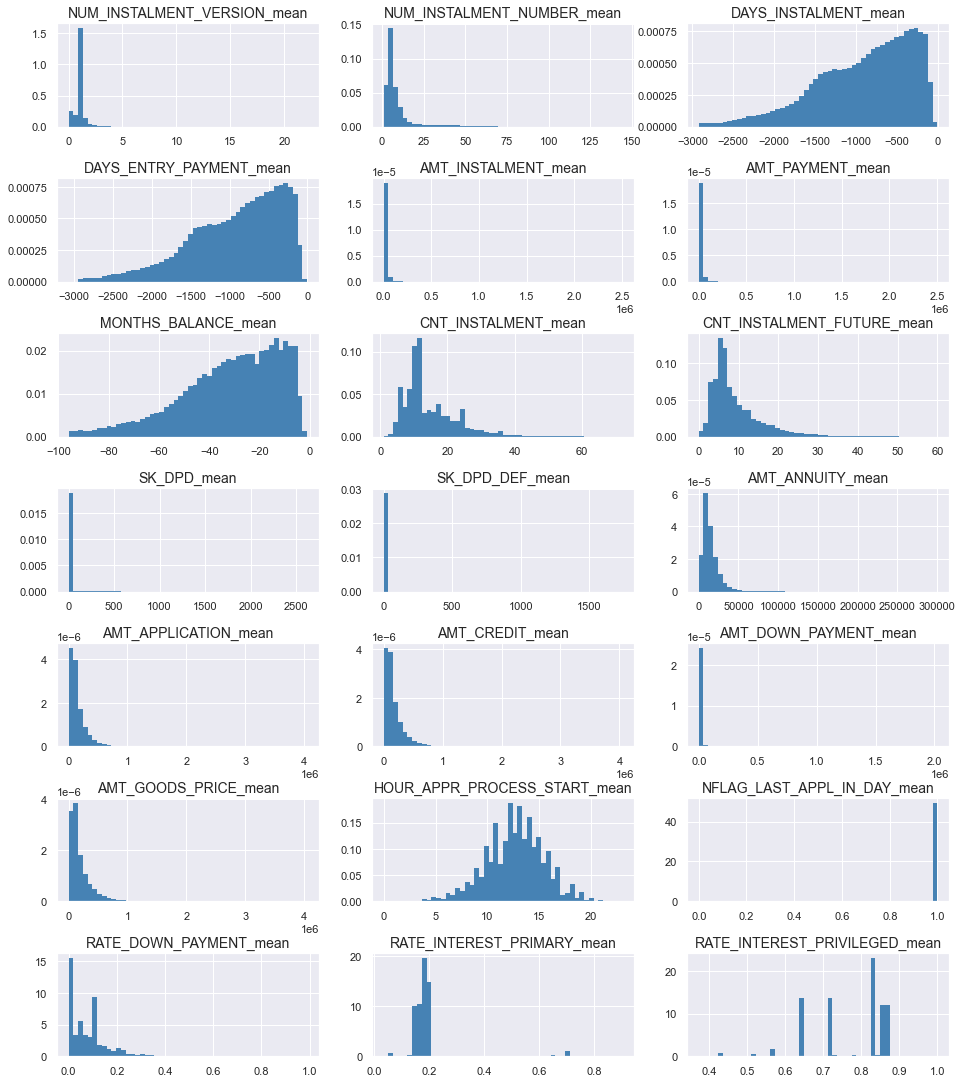

In [103]:
fig = plt.figure(figsize=(16, 19))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

for feat_idx in range(dfs['data_ext'].iloc[:,:21].shape[1]):
    ax = fig.add_subplot(7,3, (feat_idx+1))
    h = ax.hist(dfs['data_ext'].values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(dfs['data_ext'].columns[feat_idx], fontsize=14)


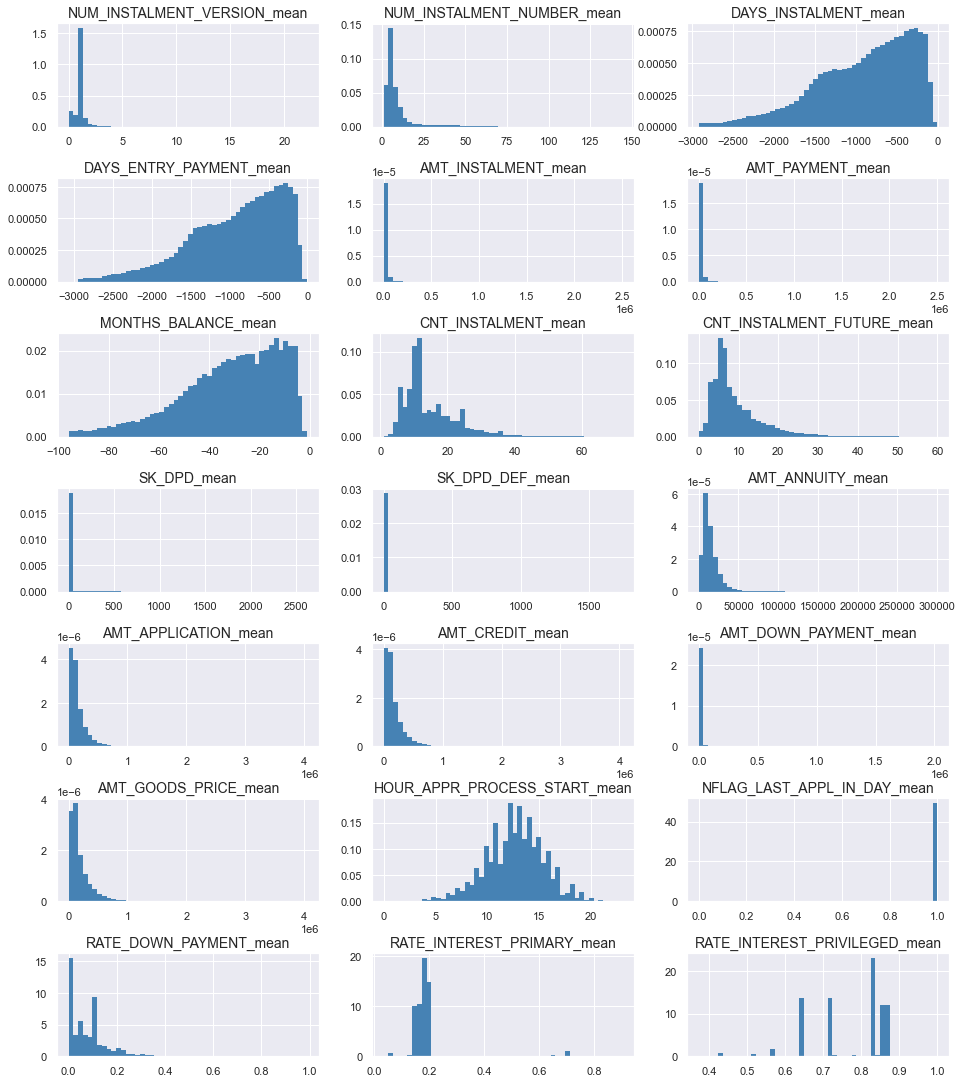

In [104]:
fig = plt.figure(figsize=(16, 19))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

for feat_idx in range(dfs['data_ext'].iloc[:,21:42].shape[1]):
    ax = fig.add_subplot(7,3, (feat_idx+1))
    h = ax.hist(dfs['data_ext'].values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(dfs['data_ext'].columns[feat_idx], fontsize=14)


# Traitement des données quantitatives 

In [105]:
train_ext=train.join(dfs['data_ext'])
train_ext.shape

(325079, 166)

In [106]:
# droper les lignes qui ont un nombre de colonne contenant des nan supérieur a 100

In [107]:
train_ext['Count Nan']=train_ext.T.isna().sum()

In [108]:
dataClean=train_ext.loc[train_ext['Count Nan']<100]
dataClean.drop(columns='Count Nan', inplace=True)
dataClean.shape

C:\Users\Karim\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(305800, 166)

In [109]:
data_float=dataClean.loc[:, dataClean.dtypes != np.object]
data_string=dataClean.loc[:, dataClean.dtypes == np.object]

## Quantification des outliers 

In [110]:
data_float.describe()

TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  305800.000000  305800.000000      3.058000e+05  3.058000e+05   
mean        0.077845       0.417956      1.717532e+05  6.052052e+05   
std         0.267928       0.721006      2.350087e+05  4.046185e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.725200e+05   
50%         0.000000       0.000000      1.575000e+05  5.212800e+05   
75%         0.000000       1.000000      2.025000e+05  8.100000e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  305787.000000     3.055430e+05               305800.000000   
mean    27410.554116     5.442611e+05                    0.020970   
std     14577.573348     3.717403e+05                    0.013930   
min      1615.500000     4.050000e+04                    0.000290   
25%     16740.000000     2.385000e+05                    0.010006   
50%     25200.000000     4.500000e+05                    0.018850   
75%     35122.500000     6.840000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE  \
count  305800.000000      305800.000000    305800.000000  106756.000000   
mean    63242.104434       -4998.561096     -3027.137744      11.969463   
std    140851.654490        3528.292542      1501.657141      11.944530   
min    -17912.000000      -24672.000000     -7197.000000       0.000000   
25%     -2834.250000       -7508.000000     -4315.000000       5.000000   
50%     -1253.000000       -4528.000000     -3305.000000       9.000000   
75%      -300.000000       -2004.000000     -1774.000000      15.000000   
max    365243.000000           0.000000         0.000000      91.000000   

          FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count  305800.000000   305800.000000    305800.000000     305800.000000   
mean        0.999997        0.821334         0.197181          0.998071   
std         0.001808        0.383073         0.397871          0.043882   
min         0.000000        0.000000         0.000000          0.000000   
25%         1.000000        1.000000         0.000000          1.000000   
50%         1.000000        1.000000         0.000000          1.000000   
75%         1.000000        1.000000         0.000000          1.000000   
max         1.000000        1.000000         1.000000          1.000000   

          FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  305800.000000  305800.000000    305799.000000         305800.000000   
mean        0.285307       0.060284         2.156547              2.047685   
std         0.451561       0.238014         0.908166              0.509205   
min         0.000000       0.000000         1.000000              1.000000   
25%         0.000000       0.000000         2.000000              2.000000   
50%         0.000000       0.000000         2.000000              2.000000   
75%         1.000000       0.000000         3.000000              2.000000   
max         1.000000       1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                305800.000000            305800.000000   
mean                      2.025896                12.092214   
std                       0.502506                 3.262836   
min                       1.000000                 0.000000   
25%                       2.000000                10.000000   
50%                       2.000000                12.000000   
75%                       2.000000                14.000000   
max                       3.000000                23.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               305800.000000               305800.000000   

In [111]:
q2=data_float.quantile(0.5)
q1=data_float.quantile(0.05)
q3=data_float.quantile(0.95)
IQR=q3-q1
filterdata = ( data_float>= q1 - 1.5 * IQR) & (data_float <= q3 + 1.5 *IQR)
#tableau des sans outliers
data_float_clean=data_float[filterdata]
#tableau des outliers
data_float_removed=data_float[~filterdata]

In [112]:
avant=(data_float.describe().loc['count']/data_float.shape[0]*100)
apres=(data_float_clean.describe().loc['count']/data_float.shape[0]*100)
out_sup=(avant-apres)*avant/100
outliers=pd.DataFrame({'Avant Outliers':avant
                       ,'Apres Outliers':apres,
                      '% outliers':out_sup})


In [113]:
outliers[outliers['% outliers']>0.5]

Avant Outliers  Apres Outliers  % outliers
REG_REGION_NOT_LIVE_REGION       100.000000       98.566383    1.433617
REG_REGION_NOT_WORK_REGION       100.000000       95.031720    4.968280
LIVE_REGION_NOT_WORK_REGION      100.000000       95.973512    4.026488
FLAG_DOCUMENT_5                  100.000000       98.510464    1.489536
FLAG_DOCUMENT_16                 100.000000       98.978090    1.021910
FLAG_DOCUMENT_18                 100.000000       99.168738    0.831262
AMT_REQ_CREDIT_BUREAU_HOUR        92.727273       92.146501    0.538534
AMT_REQ_CREDIT_BUREAU_WEEK        92.727273       89.662852    2.841554
AMT_REQ_CREDIT_BUREAU_MON         92.727273       90.899608    1.694744
SK_DPD_mean                       86.690974       84.504905    1.895125
SK_DPD_DEF_mean                   86.690974       84.942773    1.515533
AMT_DOWN_PAYMENT_mean             81.968934       81.234467    0.602035
NFLAG_LAST_APPL_IN_DAY_mean       87.124591       85.878352    1.085781
SELLERPLACE_AREA_mean             87.124591       86.494768    0.548731
DAYS_FIRST_DRAWING_mean           86.737410       86.054611    0.592242

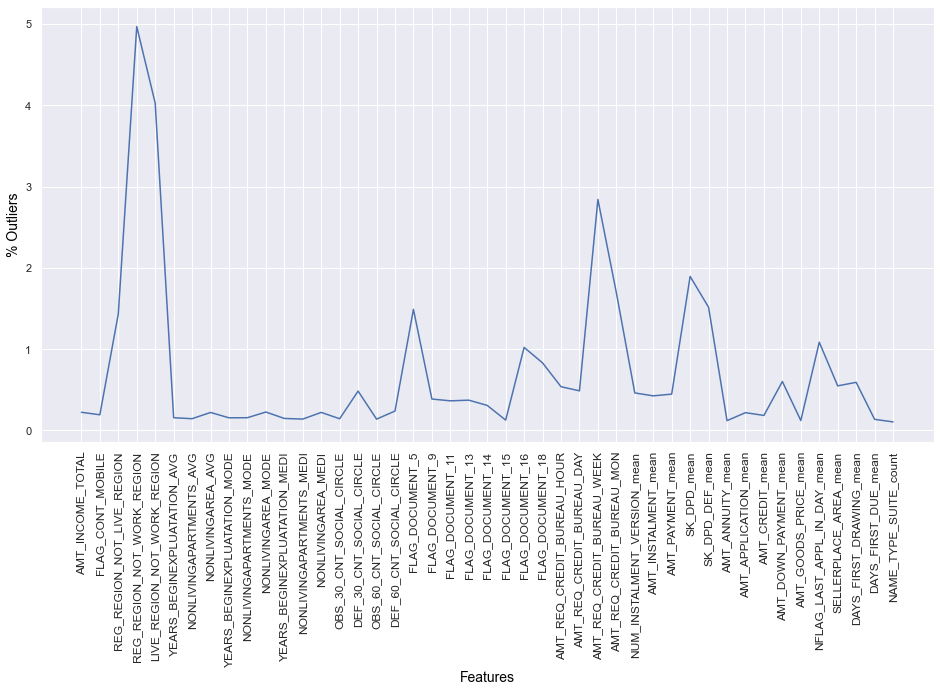

In [114]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(outliers['% outliers'][outliers['% outliers']>0.1])
sns.set(font_scale=1.0)
ax.set_ylabel("% Outliers", fontsize=14, color="Black")
ax.set_xlabel('Features', fontsize=14, color="Black")
g=plt.xticks(rotation=90, fontsize=12)


In [115]:
data_float_clean.dropna().shape

(140, 150)

In [116]:
data_float.dropna().shape

(190, 150)

In [117]:
data_float_removed.shape

(305800, 150)

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

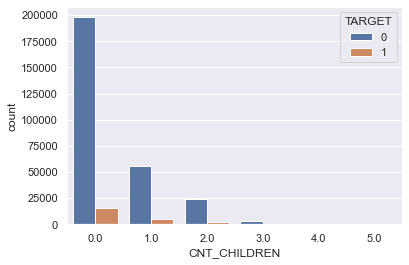

In [118]:
sns.countplot(x='CNT_CHILDREN', data=data_float_clean, hue='TARGET') 

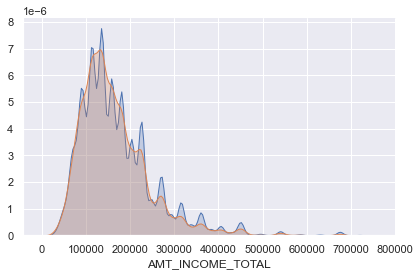

In [119]:
fig = sns.FacetGrid(data_float_clean, hue='TARGET', height=4, aspect=1.5)
fig.map(sns.kdeplot, 'AMT_INCOME_TOTAL', shade=True)

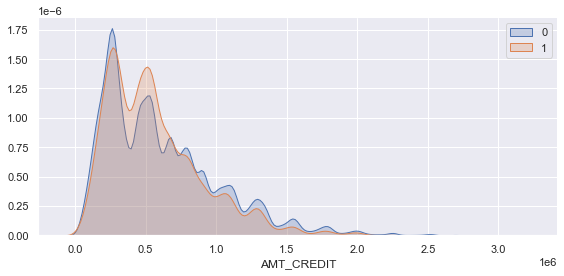

In [120]:
fig = sns.FacetGrid(data_float_clean, hue='TARGET', height=4, aspect=2)
fig.map(sns.kdeplot, 'AMT_CREDIT', shade=True)
plt.legend()

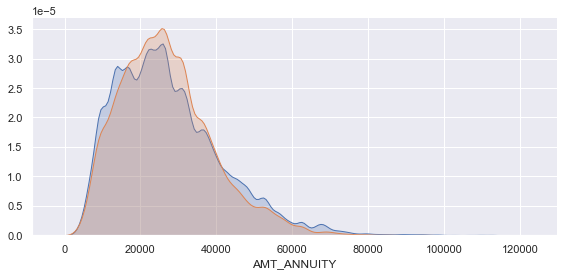

In [121]:
fig = sns.FacetGrid(data_float_clean, hue='TARGET', height=4, aspect=2)
fig.map(sns.kdeplot, 'AMT_ANNUITY', shade=True)

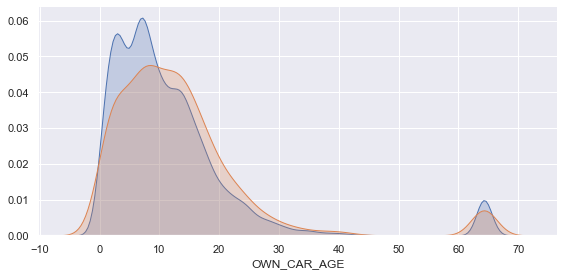

In [122]:
fig = sns.FacetGrid(data_float_clean, hue='TARGET', height=4, aspect=2)
fig.map(sns.kdeplot, 'OWN_CAR_AGE', shade=True)

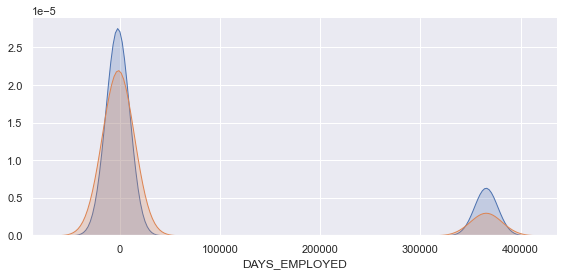

In [123]:
fig = sns.FacetGrid(data_float_clean, hue='TARGET', height=4, aspect=2)
fig.map(sns.kdeplot, 'DAYS_EMPLOYED', shade=True)

In [124]:
len(data_float_clean.columns)

150

In [125]:
listToKeep=[]
for col in data_float_clean.columns:
    if data_float_clean[col].min()!=data_float_clean[col].max():
        listToKeep.append(col)
    
len(listToKeep)

124

In [126]:
#on supprime toute les colonnes qui ont une seule valeur
data_float_clean=data_float_clean[listToKeep]

# Traitement des valeurs manquantes

In [127]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
transformed_values = imputer.fit_transform(data_float_clean)

In [128]:
transformed_values=pd.DataFrame(transformed_values)
transformed_values.columns=data_float_clean.columns
transformed_values

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0          1.0           0.0          202500.0    406597.5      24700.5   
1          0.0           0.0          270000.0   1293502.5      35698.5   
2          0.0           0.0           67500.0    135000.0       6750.0   
3          0.0           0.0          121500.0    513000.0      21865.5   
4          0.0           0.0           99000.0    490495.5      27517.5   
...        ...           ...               ...         ...          ...   
305795     0.0           0.0           72000.0    269550.0      12001.5   
305796     0.0           0.0          153000.0    677664.0      29979.0   
305797     0.0           0.0          153000.0    677664.0      29979.0   
305798     1.0           0.0          171000.0    370107.0      20205.0   
305799     0.0           0.0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
0              351000.0                    0.018801         -637.0   
1             1129500.0                    0.003541        -1188.0   
2              135000.0                    0.010032         -225.0   
3              513000.0                    0.028663        -3038.0   
4              454500.0                    0.035792        -1588.0   
...                 ...                         ...            ...   
305795         225000.0                    0.025164       365243.0   
305796         585000.0                    0.005002        -7921.0   
305797         585000.0                    0.005002        -7921.0   
305798         319500.0                    0.005313        -4786.0   
305799         675000.0                    0.046220        -1262.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  \
0                 -3648.0          -2120.0          9.0             1.0   
1                 -1186.0           -291.0          9.0             1.0   
2                 -4260.0          -2531.0         26.0             1.0   
3                 -4311.0          -3458.0          9.0             1.0   
4                 -4970.0           -477.0          9.0             1.0   
...                   ...              ...          ...             ...   
305795            -4388.0          -4090.0          9.0             0.0   
305796            -6737.0          -5150.0          9.0             1.0   
305797            -6737.0          -5150.0          9.0             1.0   
305798            -2562.0           -931.0          9.0             1.0   
305799            -5128.0           -410.0          9.0             1.0   

        FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                   0.0         1.0         0.0              1.0   
1                   0.0         1.0         0.0              2.0   
2                   1.0         1.0         0.0              1.0   
3                   0.0         0.0         0.0              1.0   
4                   1.0         1.0         0.0              2.0   
...                 ...         ...         ...              ...   
305795              0.0         1.0         0.0              1.0   
305796              0.0         0.0         1.0              1.0   
305797              0.0         0.0         1.0              1.0   
305798              0.0         0.0         0.0              2.0   
305799              1.0         1.0         0.0              2.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                        2.0                          2.0   
1                        1.0                          1.0   
2                        2.0                          2.0   
3                        2.0                          2.0   
4                        2.0                          2.0   
...                      ...                          ...   
305795                   2.0                          2.0   
305796                   3.0                          3.0   

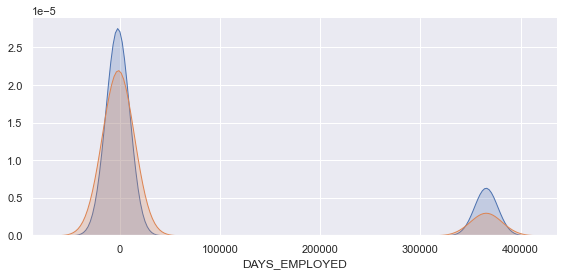

In [129]:
fig = sns.FacetGrid(transformed_values, hue='TARGET', height=4, aspect=2)
fig.map(sns.kdeplot, 'DAYS_EMPLOYED', shade=True)

In [130]:
df=transformed_values.dropna()

df=df.drop(columns=['TARGET'])
data = [
    go.Heatmap(
#         z= data_float_clean.drop(columns=['SteamUse(kBtu)','NumberofBuildings']).corr().values,
#         x=data_float_clean.drop(columns=['SteamUse(kBtu)','NumberofBuildings']).columns.values,
#         y=data_float_clean.drop(columns=['SteamUse(kBtu)','NumberofBuildings']).columns.values,
        z= df.corr().values,
        x=df.columns.values,
        y=df.columns.values,
        colorscale='Viridis',
        #text = True ,
        opacity = 1.0,
        zmin=-1,
        zmax=1
        
    )
]
layout = go.Layout(
    title='Correlation entre les attributs quantitatives',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 1000, height = 1000,
    font=dict(
        size=14,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')


# Traitement des données qualitatives [categories]

In [131]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
string_values = imputer.fit_transform(data_string)
string_values=pd.DataFrame(string_values)
string_values.columns=data_string.columns
string_values

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           M            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
305795         Cash loans           F            N               Y   
305796         Cash loans           F            N               Y   
305797         Cash loans           F            N               Y   
305798         Cash loans           F            N               Y   
305799         Cash loans           F            N               N   

        NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         Unaccompanied               Working  Secondary / secondary special   
1                Family         State servant               Higher education   
2         Unaccompanied               Working  Secondary / secondary special   
3         Unaccompanied               Working  Secondary / secondary special   
4       Spouse, partner         State servant  Secondary / secondary special   
...                 ...                   ...                            ...   
305795    Unaccompanied             Pensioner  Secondary / secondary special   
305796    Unaccompanied               Working               Higher education   
305797    Unaccompanied               Working               Higher education   
305798    Unaccompanied  Commercial associate  Secondary / secondary special   
305799    Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3       Single / not married  House / apartment      Core staff   
4                    Married  House / apartment        Laborers   
...                      ...                ...             ...   
305795                 Widow  House / apartment        Laborers   
305796             Separated  House / apartment        Managers   
305797             Separated  House / apartment        Managers   
305798               Married  House / apartment        Laborers   
305799               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
0                       WEDNESDAY  Business Entity Type 3   reg oper account   
1                          MONDAY                  School   reg oper account   
2                          MONDAY              Government   reg oper account   
3                        THURSDAY                Religion   reg oper account   
4                       WEDNESDAY                   Other   reg oper account   
...                           ...                     ...                ...   
305795                     MONDAY                     XNA   reg oper account   
305796                   THURSDAY                  School   reg oper account   
305797                   THURSDAY                  School   reg oper account   
305798                  WEDNESDAY  Business Entity Type 1   reg oper account   
305799                   THURSDAY  Business Entity Type 3   reg oper account   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       block of flats       Stone, brick                  No  
1       block of flats              Block                  No  
2       block of flats              Panel                  No  
3       block of flats              Panel                  No  
4       block of flats              Panel                  No  
...                ...                ...              

In [132]:
string_values['TARGET']=transformed_values['TARGET']

In [133]:
string_values

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           M            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
305795         Cash loans           F            N               Y   
305796         Cash loans           F            N               Y   
305797         Cash loans           F            N               Y   
305798         Cash loans           F            N               Y   
305799         Cash loans           F            N               N   

        NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         Unaccompanied               Working  Secondary / secondary special   
1                Family         State servant               Higher education   
2         Unaccompanied               Working  Secondary / secondary special   
3         Unaccompanied               Working  Secondary / secondary special   
4       Spouse, partner         State servant  Secondary / secondary special   
...                 ...                   ...                            ...   
305795    Unaccompanied             Pensioner  Secondary / secondary special   
305796    Unaccompanied               Working               Higher education   
305797    Unaccompanied               Working               Higher education   
305798    Unaccompanied  Commercial associate  Secondary / secondary special   
305799    Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3       Single / not married  House / apartment      Core staff   
4                    Married  House / apartment        Laborers   
...                      ...                ...             ...   
305795                 Widow  House / apartment        Laborers   
305796             Separated  House / apartment        Managers   
305797             Separated  House / apartment        Managers   
305798               Married  House / apartment        Laborers   
305799               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
0                       WEDNESDAY  Business Entity Type 3   reg oper account   
1                          MONDAY                  School   reg oper account   
2                          MONDAY              Government   reg oper account   
3                        THURSDAY                Religion   reg oper account   
4                       WEDNESDAY                   Other   reg oper account   
...                           ...                     ...                ...   
305795                     MONDAY                     XNA   reg oper account   
305796                   THURSDAY                  School   reg oper account   
305797                   THURSDAY                  School   reg oper account   
305798                  WEDNESDAY  Business Entity Type 1   reg oper account   
305799                   THURSDAY  Business Entity Type 3   reg oper account   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  TARGET  
0       block of flats       Stone, brick                  No     1.0  
1       block of flats              Block                  No     0.0  
2       block of flats              Panel                  No     0.0  
3       block of flats              Panel                  No     0.0  
4       block of flats              Panel                  No     0.0  
...    

In [174]:
with open('/Users/Karim/Desktop/Data_Science/Projets/Projet_07/P7_Yahiatene_Karim/app_scoring/data/string_values.pickle', 'wb') as handle:
    pickle.dump(string_values, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [176]:
string_values.shape

(305800, 17)

In [135]:
listCount=[string_values[st].value_counts().count() for st in string_values.columns]
countStringCategories=pd.DataFrame({'columns':string_values.columns
                       ,'count categories':listCount})
countStringCategories

columns  count categories
0           NAME_CONTRACT_TYPE                 2
1                  CODE_GENDER                 3
2                 FLAG_OWN_CAR                 2
3              FLAG_OWN_REALTY                 2
4              NAME_TYPE_SUITE                 7
5             NAME_INCOME_TYPE                 8
6          NAME_EDUCATION_TYPE                 5
7           NAME_FAMILY_STATUS                 6
8            NAME_HOUSING_TYPE                 6
9              OCCUPATION_TYPE                18
10  WEEKDAY_APPR_PROCESS_START                 7
11           ORGANIZATION_TYPE                58
12          FONDKAPREMONT_MODE                 4
13              HOUSETYPE_MODE                 3
14          WALLSMATERIAL_MODE                 7
15         EMERGENCYSTATE_MODE                 2
16                      TARGET                 2

In [136]:
string_values.ORGANIZATION_TYPE.drop_duplicates().tolist()

['Business Entity Type 3',
 'School',
 'Government',
 'Religion',
 'Other',
 'XNA',
 'Medicine',
 'Business Entity Type 2',
 'Self-employed',
 'Transport: type 2',
 'Housing',
 'Kindergarten',
 'Trade: type 7',
 'Industry: type 11',
 'Military',
 'Services',
 'Security Ministries',
 'Transport: type 4',
 'Industry: type 1',
 'Emergency',
 'Security',
 'Trade: type 2',
 'University',
 'Transport: type 3',
 'Police',
 'Construction',
 'Business Entity Type 1',
 'Postal',
 'Industry: type 4',
 'Agriculture',
 'Restaurant',
 'Culture',
 'Hotel',
 'Industry: type 7',
 'Trade: type 3',
 'Industry: type 3',
 'Bank',
 'Industry: type 9',
 'Insurance',
 'Trade: type 6',
 'Industry: type 2',
 'Transport: type 1',
 'Electricity',
 'Industry: type 12',
 'Mobile',
 'Trade: type 1',
 'Industry: type 5',
 'Industry: type 10',
 'Legal Services',
 'Advertising',
 'Trade: type 5',
 'Cleaning',
 'Industry: type 13',
 'Trade: type 4',
 'Telecom',
 'Industry: type 8',
 'Realtor',
 'Industry: type 6']

In [137]:
dictOrg={'Business Entity Type 3':'Business Entity',
 'School':'Education',
 'Government':'Government',
 'Religion':'Religion',
 'Other':'Other',
 'XNA':'Other',
 'Medicine':'Health',
 'Business Entity Type 2':'Business Entity',
 'Self-employed':'Self-employed',
 'Transport: type 2':'Services',
 'Housing':'Services',
 'Kindergarten':'Services',
 'Trade: type 7':'Bank and Insurance',
 'Industry: type 11':'Industry',
 'Military':'Government',
 'Services':'Services',
 'Security Ministries':'Services',
 'Transport: type 4':'Services',
 'Industry: type 1':'Industry',
 'Emergency':'Health',
 'Security':'Services',
 'Trade: type 2':'Bank and Insurance',
 'University':'Education',
 'Transport: type 3':'Services',
 'Police':'Government',
 'Construction':'Services',
 'Business Entity Type 1':'Business Entity',
 'Postal':'Services',
 'Industry: type 4':'Industry',
 'Agriculture':'Services',
 'Restaurant':'Services',
 'Culture':'Services',
 'Hotel':'Services',
 'Industry: type 7':'Industry',
 'Trade: type 3':'Bank and Insurance',
 'Industry: type 3':'Industry',
 'Bank':'Bank and Insurance',
 'Industry: type 9':'Industry',
 'Insurance':'Bank and Insurance',
 'Trade: type 6':'Bank and Insurance',
 'Industry: type 2':'Industry',
 'Transport: type 1':'Services',
 'Electricity':'Services',
 'Industry: type 12':'Industry',
 'Mobile':'Industry',
 'Trade: type 1':'Bank and Insurance',
 'Industry: type 5':'Industry',
 'Industry: type 10':'Industry',
 'Legal Services':'Services',
 'Advertising':'Industry',
 'Trade: type 5':'Bank and Insurance',
 'Cleaning':'Services',
 'Industry: type 13':'Industry',
 'Trade: type 4':'Bank and Insurance',
 'Telecom':'Industry',
 'Industry: type 8':'Industry',
 'Realtor':'Services',
 'Industry: type 6':'Industry'}

In [138]:
string_values.ORGANIZATION_TYPE.replace(dictOrg, inplace=True)

In [139]:
string_values.ORGANIZATION_TYPE.drop_duplicates().tolist()

['Business Entity',
 'Education',
 'Government',
 'Religion',
 'Other',
 'Health',
 'Self-employed',
 'Services',
 'Bank and Insurance',
 'Industry']

In [140]:
string_values.OCCUPATION_TYPE.drop_duplicates().tolist()

['Laborers',
 'Core staff',
 'Accountants',
 'Managers',
 'Drivers',
 'Sales staff',
 'Cleaning staff',
 'Cooking staff',
 'Private service staff',
 'Medicine staff',
 'Security staff',
 'Waiters/barmen staff',
 'Low-skill Laborers',
 'Realty agents',
 'Secretaries',
 'High skill tech staff',
 'IT staff',
 'HR staff']

In [141]:
dictOcc={'Laborers':'Laborers',
 'Core staff':'Service staff',
 'Accountants':'Accountants',
 'Managers':'Managers',
 'Drivers':'Service staff',
 'Sales staff':'Service staff',
 'Cleaning staff':'Service staff',
 'Cooking staff':'Service staff',
 'Private service staff':'Service staff',
 'Medicine staff':'Medicine staff',
 'Security staff':'Service staff',
 'Waiters/barmen staff':'Service staff',
 'Low-skill Laborers':'Laborers',
 'Realty agents':'Realty agents',
 'Secretaries':'Secretaries',
 'High skill tech staff':'IT staff',
 'IT staff':'IT staff',
 'HR staff':'HR staff'}

In [142]:
string_values.OCCUPATION_TYPE.replace(dictOcc, inplace=True)

In [143]:
string_values.OCCUPATION_TYPE.drop_duplicates().tolist()

['Laborers',
 'Service staff',
 'Accountants',
 'Managers',
 'Medicine staff',
 'Realty agents',
 'Secretaries',
 'IT staff',
 'HR staff']

In [144]:
# ORGANIZATION_TYPE_normal=string_values.ORGANIZATION_TYPE.value_counts()/string_values.ORGANIZATION_TYPE.value_counts().max()
# ORGANIZATION_TYPE_normal=dict(ORGANIZATION_TYPE_normal)
# string_values.ORGANIZATION_TYPE.replace(ORGANIZATION_TYPE_normal, inplace=True)

In [145]:
# OCCUPATION_TYPE_normal=string_values.OCCUPATION_TYPE.value_counts()/string_values.OCCUPATION_TYPE.value_counts().max()
# OCCUPATION_TYPE_normal=dict(OCCUPATION_TYPE_normal)
# string_values.OCCUPATION_TYPE.replace(OCCUPATION_TYPE_normal, inplace=True)

In [146]:
# OCCUPATION_TYPE_normal

In [147]:
# OCCUPATION_TYPE_normal

In [148]:
with open('/Users/Karim/Desktop/Data_Science/Projets/Projet_07/P7_Yahiatene_Karim/app_scoring/data/string_values.pickle', 'wb') as handle:
    pickle.dump(string_values, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [149]:
data_string_toEncode=string_values.drop(['TARGET'],axis='columns')

In [150]:
data_string_toEncode.dropna()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           M            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
305795         Cash loans           F            N               Y   
305796         Cash loans           F            N               Y   
305797         Cash loans           F            N               Y   
305798         Cash loans           F            N               Y   
305799         Cash loans           F            N               N   

        NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         Unaccompanied               Working  Secondary / secondary special   
1                Family         State servant               Higher education   
2         Unaccompanied               Working  Secondary / secondary special   
3         Unaccompanied               Working  Secondary / secondary special   
4       Spouse, partner         State servant  Secondary / secondary special   
...                 ...                   ...                            ...   
305795    Unaccompanied             Pensioner  Secondary / secondary special   
305796    Unaccompanied               Working               Higher education   
305797    Unaccompanied               Working               Higher education   
305798    Unaccompanied  Commercial associate  Secondary / secondary special   
305799    Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment   Service staff   
2       Single / not married  House / apartment        Laborers   
3       Single / not married  House / apartment   Service staff   
4                    Married  House / apartment        Laborers   
...                      ...                ...             ...   
305795                 Widow  House / apartment        Laborers   
305796             Separated  House / apartment        Managers   
305797             Separated  House / apartment        Managers   
305798               Married  House / apartment        Laborers   
305799               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
0                       WEDNESDAY   Business Entity   reg oper account   
1                          MONDAY         Education   reg oper account   
2                          MONDAY        Government   reg oper account   
3                        THURSDAY          Religion   reg oper account   
4                       WEDNESDAY             Other   reg oper account   
...                           ...               ...                ...   
305795                     MONDAY             Other   reg oper account   
305796                   THURSDAY         Education   reg oper account   
305797                   THURSDAY         Education   reg oper account   
305798                  WEDNESDAY   Business Entity   reg oper account   
305799                   THURSDAY   Business Entity   reg oper account   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       block of flats       Stone, brick                  No  
1       block of flats              Block                  No  
2       block of flats              Panel                  No  
3       block of flats              Panel                  No  
4       block of flats              Panel                  No  
...                ...                ...                 ...  
305795  block of flats       Stone, brick                  No  

In [151]:


# with open('/Users/Karim/Desktop/Data_Science/Projets/Projet_07/P7_Yahiatene_Karim/app_scoring/data/ORGANIZATION_TYPE_normal.pickle', 'wb') as handle:
#     pickle.dump(ORGANIZATION_TYPE_normal, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('/Users/Karim/Desktop/Data_Science/Projets/Projet_07/P7_Yahiatene_Karim/app_scoring/data/OCCUPATION_TYPE_normal.pickle', 'wb') as handle:
#     pickle.dump(OCCUPATION_TYPE_normal, handle, protocol=pickle.HIGHEST_PROTOCOL)

## One Hot Encoding 

In [152]:
data_string_toEncode

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           M            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
305795         Cash loans           F            N               Y   
305796         Cash loans           F            N               Y   
305797         Cash loans           F            N               Y   
305798         Cash loans           F            N               Y   
305799         Cash loans           F            N               N   

        NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         Unaccompanied               Working  Secondary / secondary special   
1                Family         State servant               Higher education   
2         Unaccompanied               Working  Secondary / secondary special   
3         Unaccompanied               Working  Secondary / secondary special   
4       Spouse, partner         State servant  Secondary / secondary special   
...                 ...                   ...                            ...   
305795    Unaccompanied             Pensioner  Secondary / secondary special   
305796    Unaccompanied               Working               Higher education   
305797    Unaccompanied               Working               Higher education   
305798    Unaccompanied  Commercial associate  Secondary / secondary special   
305799    Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment   Service staff   
2       Single / not married  House / apartment        Laborers   
3       Single / not married  House / apartment   Service staff   
4                    Married  House / apartment        Laborers   
...                      ...                ...             ...   
305795                 Widow  House / apartment        Laborers   
305796             Separated  House / apartment        Managers   
305797             Separated  House / apartment        Managers   
305798               Married  House / apartment        Laborers   
305799               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
0                       WEDNESDAY   Business Entity   reg oper account   
1                          MONDAY         Education   reg oper account   
2                          MONDAY        Government   reg oper account   
3                        THURSDAY          Religion   reg oper account   
4                       WEDNESDAY             Other   reg oper account   
...                           ...               ...                ...   
305795                     MONDAY             Other   reg oper account   
305796                   THURSDAY         Education   reg oper account   
305797                   THURSDAY         Education   reg oper account   
305798                  WEDNESDAY   Business Entity   reg oper account   
305799                   THURSDAY   Business Entity   reg oper account   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       block of flats       Stone, brick                  No  
1       block of flats              Block                  No  
2       block of flats              Panel                  No  
3       block of flats              Panel                  No  
4       block of flats              Panel                  No  
...                ...                ...                 ...  
305795  block of flats       Stone, brick                  No  

In [153]:
listColonEncoded=[]
for col in data_string_toEncode.columns:
    listColonEncoded.append(col+'_'+data_string_toEncode[col].drop_duplicates().values)
listColonEncoded=np.concatenate(listColonEncoded)
listColonEncoded

array(['NAME_CONTRACT_TYPE_Cash loans',
       'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M',
       'CODE_GENDER_F', 'CODE_GENDER_XNA', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y', 'FLAG_OWN_REALTY_N',
       'NAME_TYPE_SUITE_Unaccompanied', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Children',
       'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B',
       'NAME_TYPE_SUITE_Group of people', 'NAME_INCOME_TYPE_Working',
       'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_Unemployed',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Businessman',
       'NAME_INCOME_TYPE_Maternity leave',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Academi

In [154]:
encoder = OneHotEncoder(sparse=False)
OHEncodedData = encoder.fit_transform(data_string_toEncode.values)
OHEncodedData.shape

OHEncodedData=pd.DataFrame(OHEncodedData)
OHEncodedData.columns=listColonEncoded
OHEncodedData

NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  \
0                                 1.0                                 0.0   
1                                 1.0                                 0.0   
2                                 0.0                                 1.0   
3                                 1.0                                 0.0   
4                                 1.0                                 0.0   
...                               ...                                 ...   
305795                            1.0                                 0.0   
305796                            1.0                                 0.0   
305797                            1.0                                 0.0   
305798                            1.0                                 0.0   
305799                            1.0                                 0.0   

        CODE_GENDER_M  CODE_GENDER_F  CODE_GENDER_XNA  FLAG_OWN_CAR_N  \
0                 0.0            1.0              0.0             1.0   
1                 1.0            0.0              0.0             1.0   
2                 0.0            1.0              0.0             0.0   
3                 0.0            1.0              0.0             1.0   
4                 0.0            1.0              0.0             1.0   
...               ...            ...              ...             ...   
305795            1.0            0.0              0.0             1.0   
305796            1.0            0.0              0.0             1.0   
305797            1.0            0.0              0.0             1.0   
305798            1.0            0.0              0.0             1.0   
305799            1.0            0.0              0.0             1.0   

        FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  FLAG_OWN_REALTY_N  \
0                  0.0                0.0                1.0   
1                  0.0                1.0                0.0   
2                  1.0                0.0                1.0   
3                  0.0                0.0                1.0   
4                  0.0                0.0                1.0   
...                ...                ...                ...   
305795             0.0                0.0                1.0   
305796             0.0                0.0                1.0   
305797             0.0                0.0                1.0   
305798             0.0                0.0                1.0   
305799             0.0                1.0                0.0   

        NAME_TYPE_SUITE_Unaccompanied  NAME_TYPE_SUITE_Family  \
0                                 0.0                     0.0   
1                                 0.0                     1.0   
2                                 0.0                     0.0   
3                                 0.0                     0.0   
4                                 0.0                     0.0   
...                               ...                     ...   
305795                            0.0                     0.0   
305796                            0.0                     0.0   
305797                            0.0                     0.0   
305798                            0.0                     0.0   
305799                            0.0                     0.0   

        NAME_TYPE_SUITE_Spouse, partner  NAME_TYPE_SUITE_Children  \
0                                   0.0                       0.0   
1                                   0.0                       0.0   
2                                   0.0                       0.0   
3                                   0.0                       0.0   
4                                   0.0                       0.0   
...                                 ...                       ...   
305795                              0.0                       0.0   
305796                              0.0                       0.0   
305797                             

In [155]:
# concatenate encoded data with  cardinal encoded data
# OHEdata = pd.concat([OHEncodedData, string_values[['OCCUPATION_TYPE','ORGANIZATION_TYPE']]], axis=1)
OHEdata = OHEncodedData.copy()

### Merger données encodées et quantitatives

In [156]:
data_merge = pd.concat([OHEdata,transformed_values ], axis=1)

In [157]:
data_merge.shape

(305800, 207)

In [158]:
data_merge.dropna().shape

(305800, 207)

In [159]:
data_merge.columns

Index(['NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans',
       'CODE_GENDER_M', 'CODE_GENDER_F', 'CODE_GENDER_XNA', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y', 'FLAG_OWN_REALTY_N',
       'NAME_TYPE_SUITE_Unaccompanied',
       ...
       'CODE_REJECT_REASON_count', 'NAME_TYPE_SUITE_count',
       'NAME_CLIENT_TYPE_count', 'NAME_GOODS_CATEGORY_count',
       'NAME_PORTFOLIO_count', 'NAME_PRODUCT_TYPE_count', 'CHANNEL_TYPE_count',
       'NAME_SELLER_INDUSTRY_count', 'NAME_YIELD_GROUP_count',
       'PRODUCT_COMBINATION_count'],
      dtype='object', length=207)

# Equilibrage des données

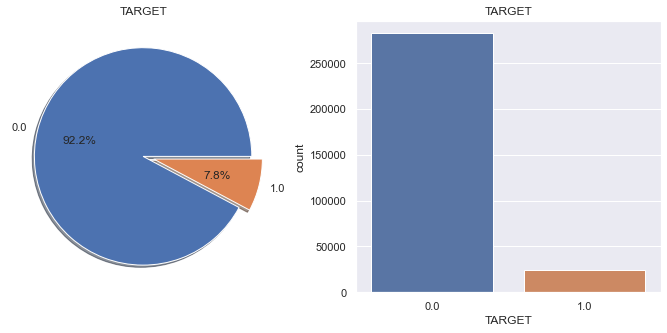

In [160]:
sns.set()
figure ,ax = plt.subplots(1, 2, figsize=(12,5))

data_merge['TARGET'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('TARGET')
ax[0].set_ylabel('')

sns.countplot(x='TARGET', data=data_merge, ax=ax[1])
ax[1].set_title('TARGET')

plt.show()

In [161]:
temporary_zero=data_merge[data_merge.TARGET==0]
temporary_one=data_merge[data_merge.TARGET==1]
import random
listIndexTemp=np.random.choice(temporary_zero.index,23000)
temporary_zero=temporary_zero.loc[listIndexTemp]
temporary=np.concatenate([temporary_zero,temporary_one])
temporary=pd.DataFrame(temporary)
temporary.columns=temporary_zero.columns

temporary


NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  \
0                                1.0                                 0.0   
1                                1.0                                 0.0   
2                                1.0                                 0.0   
3                                1.0                                 0.0   
4                                1.0                                 0.0   
...                              ...                                 ...   
46800                            1.0                                 0.0   
46801                            1.0                                 0.0   
46802                            1.0                                 0.0   
46803                            1.0                                 0.0   
46804                            1.0                                 0.0   

       CODE_GENDER_M  CODE_GENDER_F  CODE_GENDER_XNA  FLAG_OWN_CAR_N  \
0                1.0            0.0              0.0             1.0   
1                1.0            0.0              0.0             1.0   
2                1.0            0.0              0.0             0.0   
3                0.0            1.0              0.0             0.0   
4                1.0            0.0              0.0             1.0   
...              ...            ...              ...             ...   
46800            1.0            0.0              0.0             1.0   
46801            0.0            1.0              0.0             1.0   
46802            0.0            1.0              0.0             1.0   
46803            1.0            0.0              0.0             1.0   
46804            1.0            0.0              0.0             1.0   

       FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  FLAG_OWN_REALTY_N  \
0                 0.0                0.0                1.0   
1                 0.0                0.0                1.0   
2                 1.0                0.0                1.0   
3                 1.0                0.0                1.0   
4                 0.0                1.0                0.0   
...               ...                ...                ...   
46800             0.0                1.0                0.0   
46801             0.0                0.0                1.0   
46802             0.0                0.0                1.0   
46803             0.0                0.0                1.0   
46804             0.0                0.0                1.0   

       NAME_TYPE_SUITE_Unaccompanied  NAME_TYPE_SUITE_Family  \
0                                0.0                     1.0   
1                                0.0                     1.0   
2                                0.0                     0.0   
3                                0.0                     0.0   
4                                0.0                     0.0   
...                              ...                     ...   
46800                            0.0                     0.0   
46801                            0.0                     1.0   
46802                            0.0                     1.0   
46803                            0.0                     0.0   
46804                            0.0                     0.0   

       NAME_TYPE_SUITE_Spouse, partner  NAME_TYPE_SUITE_Children  \
0                                  0.0                       0.0   
1                                  0.0                       0.0   
2                                  0.0                       0.0   
3                                  0.0                       0.0   
4                                  0.0                       0.0   
...                                ...                       ...   
46800                              0.0                       0.0   
46801                              0.0                       0.0   
46802                              0.0                       0.0   
46803                  

In [162]:
np.random.shuffle(temporary.values) 
temporary



NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  \
0                                1.0                                 0.0   
1                                1.0                                 0.0   
2                                1.0                                 0.0   
3                                0.0                                 1.0   
4                                1.0                                 0.0   
...                              ...                                 ...   
46800                            1.0                                 0.0   
46801                            1.0                                 0.0   
46802                            1.0                                 0.0   
46803                            1.0                                 0.0   
46804                            1.0                                 0.0   

       CODE_GENDER_M  CODE_GENDER_F  CODE_GENDER_XNA  FLAG_OWN_CAR_N  \
0                1.0            0.0              0.0             1.0   
1                1.0            0.0              0.0             1.0   
2                1.0            0.0              0.0             1.0   
3                0.0            1.0              0.0             0.0   
4                1.0            0.0              0.0             0.0   
...              ...            ...              ...             ...   
46800            0.0            1.0              0.0             1.0   
46801            0.0            1.0              0.0             0.0   
46802            1.0            0.0              0.0             1.0   
46803            1.0            0.0              0.0             1.0   
46804            0.0            1.0              0.0             0.0   

       FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  FLAG_OWN_REALTY_N  \
0                 0.0                0.0                1.0   
1                 0.0                1.0                0.0   
2                 0.0                0.0                1.0   
3                 1.0                0.0                1.0   
4                 1.0                0.0                1.0   
...               ...                ...                ...   
46800             0.0                0.0                1.0   
46801             1.0                1.0                0.0   
46802             0.0                0.0                1.0   
46803             0.0                0.0                1.0   
46804             1.0                0.0                1.0   

       NAME_TYPE_SUITE_Unaccompanied  NAME_TYPE_SUITE_Family  \
0                                0.0                     0.0   
1                                0.0                     0.0   
2                                0.0                     1.0   
3                                0.0                     0.0   
4                                0.0                     1.0   
...                              ...                     ...   
46800                            0.0                     0.0   
46801                            0.0                     1.0   
46802                            0.0                     0.0   
46803                            0.0                     0.0   
46804                            0.0                     0.0   

       NAME_TYPE_SUITE_Spouse, partner  NAME_TYPE_SUITE_Children  \
0                                  0.0                       0.0   
1                                  0.0                       0.0   
2                                  0.0                       0.0   
3                                  0.0                       0.0   
4                                  0.0                       0.0   
...                                ...                       ...   
46800                              0.0                       0.0   
46801                              0.0                       0.0   
46802                              0.0                       0.0   
46803                  

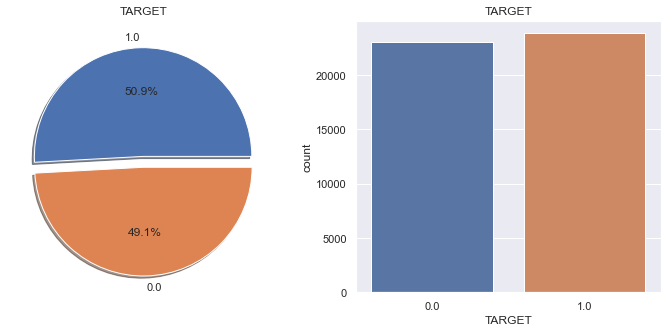

In [163]:
sns.set()
figure ,ax = plt.subplots(1, 2, figsize=(12,5))

temporary['TARGET'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('TARGET')
ax[0].set_ylabel('')

sns.countplot(x='TARGET', data=temporary, ax=ax[1])
ax[1].set_title('TARGET')

plt.show()

In [164]:
data_merge=temporary
data_merge.shape


(46805, 207)

# Réduction du nombre de features

In [165]:
# X=data_merge.drop(['TARGET'], axis=1)
# y=data_merge['TARGET']

### mise à l'echelle 

In [166]:
# scaler = StandardScaler()

# # data
# X_scaled = scaler.fit_transform(X)
# X_scaled=pd.DataFrame(X_scaled)
# X_scaled.columns=X.columns


# X_scaled_select=X_scaled.loc[:,:]
# X_scaled_select.shape

### Reduction des données (PCA) 

In [167]:
# #decomposition en ACP
# n_comp=X_scaled_select.shape[1]
# l_pca = PCA(n_components=n_comp,random_state=12)
# print("done")
# pca_result=l_pca.fit_transform(X_scaled_select)
# print("done")
# #transformation des composantes en df avec les noms des composantes comme nom de colonnes
# df_l_PCA=pd.DataFrame()
# for i in range(pca_result.shape[1]):
#     df_l_PCA['pca_'+str(i+1)]=pca_result[:,i]

In [168]:
# plt.figure(figsize=(12,7))
# plt.title('Somme cumulée de variance des composantes de l\'ACP')
# plt.xlabel('Nombre de composantes de l\'ACP')
# plt.ylabel('Variance cumulée')
# plt.plot(list(range(n_comp)),np.cumsum(l_pca.explained_variance_ratio_))

In [169]:
# # Dump components relations with features:
# df_importance=pd.DataFrame((l_pca.components_),columns=X_scaled_select.columns)
# df_importance=df_importance.sum(axis=0)
# df_importance=pd.DataFrame({"features":X_scaled_select.columns.tolist(),"count":df_importance.values})
# df_importance.sort_values("count", ascending=False, inplace=True)
# df_importance=df_importance.iloc[:70]

In [170]:
# sns.set_style("darkgrid")

# fig, ax = plt.subplots(figsize=(15, 20))
# fig.tight_layout()

# sns.barplot(x=df_importance['count'],
#               y=df_importance['features'],
#               data=df,ax=ax)
# sns.set(font_scale=1.5)
# plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="left" )

# ax.set_title("Importance des features", fontsize=18, color="Black")

In [171]:
# listFeaturesToKeep=[]
# for col in df_importance.features:
#     if col[-5:]=="count" :
#         listFeaturesToKeep.append(col[:-6])
#     elif col[-4:]=="mean" :
#         listFeaturesToKeep.append(col[:-5])
#     elif col[-3:]=="AVG" :
#         listFeaturesToKeep.append(col[:-4])
#     else:
#         listFeaturesToKeep.append(col)
# listFeaturesToKeep    

In [172]:
#creation de données pour model d'application
transformed_values.head(2)

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0     1.0           0.0          202500.0    406597.5      24700.5   
1     0.0           0.0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
0         351000.0                    0.018801         -637.0   
1        1129500.0                    0.003541        -1188.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  \
0            -3648.0          -2120.0          9.0             1.0   
1            -1186.0           -291.0          9.0             1.0   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0              0.0         1.0         0.0              1.0   
1              0.0         1.0         0.0              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                   2.0                          2.0                     10.0   
1                   1.0                          1.0                     11.0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                     0.0                     0.0                      0.0   
1                     0.0                     0.0                      0.0   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  ...  \
0      0.083037      0.262949      0.139376  ...   
1      0.311267      0.622246      0.533482  ...   

   RATE_INTEREST_PRIVILEGED_mean  DAYS_DECISION_mean  SELLERPLACE_AREA_mean  \
0                       0.835095         -457.000000              42.000000   
1                       0.835095        -1387.307692             373.076923   

   CNT_PAYMENT_mean  DAYS_FIRST_DRAWING_mean  DAYS_FIRST_DUE_mean  \
0              12.0                 365243.0          -427.000000   
1              16.6                 365243.0         59524.333333   

   DAYS_LAST_DUE_1ST_VERSION_mean  DAYS_LAST_DUE_mean  DAYS_TERMINATION_mean  \
0                      -97.000000               -97.0             -93.000000   
1                    60029.333333            181719.0          181745.666667   

   NFLAG_INSURED_ON_APPROVAL_mean  NAME_CONTRACT_TYPE_count  \
0                             1.0                       1.0   
1                             0.5                      13.0   

   WEEKDAY_APPR_PROCESS_START_count  FLAG_LAST_APPL_PER_CONTRACT_count  \
0                               1.0                                1.0   
1                              13.0                               13.0   

   NAME_CASH_LOAN_PURPOSE_count  NAME_PAYMENT_TYPE_count  \
0                           1.0                      1.0   
1                          13.0                     13.0   

   CODE_REJECT_REASON_count  NAME_TYPE_SUITE_count  NAME_CLIENT_TYPE_count  \
0                       1.0                    0.0                     1.0   
1                      13.0                    9.0                    13.0   

   NAME_GOODS_CATEGORY_count  NAME_PORTFOLIO_count  NAME_PRODUCT_TYPE_count  \
0                        1.0                   1.0                      1.0   
1                       13.0                  13.0                     13.0   

   CHANNEL_TYPE_count  NAME_SELLER_INDUSTRY_count  NAME_YIELD_GROUP_count  \
0                 1.0                         1.0                     1.0   
1                13.0                        13.0                    13.0   

   PRODUCT_COMBINATION_count  
0                        1.0  
1                       13.0  

[2 rows x 124 columns]

In [177]:

#liste de features a entrée 
list_features=['TARGET',
               'NAME_CONTRACT_TYPE_Cash loans',
               'NAME_CONTRACT_TYPE_Revolving loans',
               'CODE_GENDER_M',
               'CODE_GENDER_F',
               'CODE_GENDER_XNA',
               'FLAG_OWN_CAR_N',
               'FLAG_OWN_CAR_Y',
               'CNT_CHILDREN',
               'FLAG_OWN_REALTY_N',
               'FLAG_OWN_REALTY_Y',
               'AMT_INCOME_TOTAL',
               'AMT_CREDIT',
               'AMT_ANNUITY',
               'AMT_GOODS_PRICE',
               'AGE',
               'NAME_FAMILY_STATUS_Single / not married',
               'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Widow',
               'NAME_FAMILY_STATUS_Civil marriage',
               'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Unknown',
               'NAME_HOUSING_TYPE_House / apartment',
               'NAME_HOUSING_TYPE_Rented apartment',
               'NAME_HOUSING_TYPE_With parents',
               'NAME_HOUSING_TYPE_Municipal apartment',
               'NAME_HOUSING_TYPE_Office apartment',
               'NAME_HOUSING_TYPE_Co-op apartment',
               'NAME_EDUCATION_TYPE_Secondary / secondary special',
               'NAME_EDUCATION_TYPE_Higher education',
               'NAME_EDUCATION_TYPE_Incomplete higher',
               'NAME_EDUCATION_TYPE_Lower secondary',
               'NAME_EDUCATION_TYPE_Academic degree',
               'DAYS_EMPLOYED',
               'ORGANIZATION_TYPE_Business Entity',
               'ORGANIZATION_TYPE_Education',
               'ORGANIZATION_TYPE_Government',
               'ORGANIZATION_TYPE_Religion',
               'ORGANIZATION_TYPE_Other', 
               'ORGANIZATION_TYPE_Health',
               'ORGANIZATION_TYPE_Self-employed',
               'ORGANIZATION_TYPE_Services',
               'ORGANIZATION_TYPE_Bank and Insurance',
               'ORGANIZATION_TYPE_Industry',
               'OCCUPATION_TYPE_Laborers',
               'OCCUPATION_TYPE_Service staff',
               'OCCUPATION_TYPE_Accountants',
               'OCCUPATION_TYPE_Managers', 
               'OCCUPATION_TYPE_Medicine staff',
               'OCCUPATION_TYPE_Realty agents', 
               'OCCUPATION_TYPE_Secretaries',
               'OCCUPATION_TYPE_IT staff', 
               'OCCUPATION_TYPE_HR staff']

dict_features={'NAME_CONTRACT_TYPE':"type_contrat",
               'CODE_GENDER':"genre",
               'FLAG_OWN_CAR':"voiture",
               'CNT_CHILDREN':"nombre_enfant",
               'FLAG_OWN_REALTY':"propriétaire",
               'AMT_INCOME_TOTAL':"rente_annuelle",
               'AMT_CREDIT':"montant_pret",
               'AMT_ANNUITY':"rente_pret",
               'AMT_GOODS_PRICE':"prix_bien_pret_accordé",
               'AGE':"age",
               'NAME_FAMILY_STATUS':"statut_marital",
               'NAME_HOUSING_TYPE':"type_immobilier",
               'NAME_EDUCATION_TYPE':"niveau_etude",
               'DAYS_EMPLOYED':"durée_emploi",
               'ORGANIZATION_TYPE':"type_societé",
               'OCCUPATION_TYPE':"type_post"}





data_appli=data_merge[list_features]
data_appli.shape

(46805, 53)

In [178]:
data_appli.shape

(46805, 53)

In [179]:
with open('/Users/Karim/Desktop/Data_Science/Projets/Projet_07/P7_Yahiatene_Karim/app_scoring/data/data_appli.pickle', 'wb') as handle:
    pickle.dump(data_appli, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [180]:
data_merge

NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  \
0                                1.0                                 0.0   
1                                1.0                                 0.0   
2                                1.0                                 0.0   
3                                0.0                                 1.0   
4                                1.0                                 0.0   
...                              ...                                 ...   
46800                            1.0                                 0.0   
46801                            1.0                                 0.0   
46802                            1.0                                 0.0   
46803                            1.0                                 0.0   
46804                            1.0                                 0.0   

       CODE_GENDER_M  CODE_GENDER_F  CODE_GENDER_XNA  FLAG_OWN_CAR_N  \
0                1.0            0.0              0.0             1.0   
1                1.0            0.0              0.0             1.0   
2                1.0            0.0              0.0             1.0   
3                0.0            1.0              0.0             0.0   
4                1.0            0.0              0.0             0.0   
...              ...            ...              ...             ...   
46800            0.0            1.0              0.0             1.0   
46801            0.0            1.0              0.0             0.0   
46802            1.0            0.0              0.0             1.0   
46803            1.0            0.0              0.0             1.0   
46804            0.0            1.0              0.0             0.0   

       FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  FLAG_OWN_REALTY_N  \
0                 0.0                0.0                1.0   
1                 0.0                1.0                0.0   
2                 0.0                0.0                1.0   
3                 1.0                0.0                1.0   
4                 1.0                0.0                1.0   
...               ...                ...                ...   
46800             0.0                0.0                1.0   
46801             1.0                1.0                0.0   
46802             0.0                0.0                1.0   
46803             0.0                0.0                1.0   
46804             1.0                0.0                1.0   

       NAME_TYPE_SUITE_Unaccompanied  NAME_TYPE_SUITE_Family  \
0                                0.0                     0.0   
1                                0.0                     0.0   
2                                0.0                     1.0   
3                                0.0                     0.0   
4                                0.0                     1.0   
...                              ...                     ...   
46800                            0.0                     0.0   
46801                            0.0                     1.0   
46802                            0.0                     0.0   
46803                            0.0                     0.0   
46804                            0.0                     0.0   

       NAME_TYPE_SUITE_Spouse, partner  NAME_TYPE_SUITE_Children  \
0                                  0.0                       0.0   
1                                  0.0                       0.0   
2                                  0.0                       0.0   
3                                  0.0                       0.0   
4                                  0.0                       0.0   
...                                ...                       ...   
46800                              0.0                       0.0   
46801                              0.0                       0.0   
46802                              0.0                       0.0   
46803                  

# VI. Ecriture des données nettoyées

In [181]:
### Export all features
with open('/Users/Karim/Desktop/Data_Science/Projets/Projet_07/P7_Yahiatene_Karim/app_scoring/data/data_merge.pickle', 'wb') as handle:
    pickle.dump(data_merge, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [182]:
### Export selected features
with open('/Users/Karim/Desktop/Data_Science/Projets/Projet_07/P7_Yahiatene_Karim/app_scoring/data/data_appli.pickle', 'wb') as handle:
    pickle.dump(data_appli, handle, protocol=pickle.HIGHEST_PROTOCOL)